### EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

Steps involved in EDA 
- Describing the data 
- Data cleaning Imputation techniques 
- Data analysis and visualization 
- Transformations 
- Auto eda
Auto EDA
Auto EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/EDA-1/data_clean.csv", index_col= 0)
df

Ozone  Solar.R  Wind Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     5    1  2010    67       S
2     36.0    118.0   8.0     5    2  2010    72       C
3     12.0    149.0  12.6     5    3  2010    74      PS
4     18.0    313.0  11.5     5    4  2010    62       S
5      NaN      NaN  14.3     5    5  2010    56       S
..     ...      ...   ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     5    1  2010    67       C
155   30.0    193.0   6.9     9   26  2010    70      PS
156    NaN    145.0  13.2     9   27  2010    77       S
157   14.0    191.0  14.3     9   28  2010    75       S
158   18.0    131.0   8.0     9   29  2010    76       C

[158 rows x 8 columns]

In [3]:
#If the column Varience is 0 that means that column provide no info we can drop that coln
# Step 1. Describing the data
df.describe()
#mean > median positive skewness
#mean < median negative skewness
# varience is a measure of the spread or dispersion of a set of data points. 

Ozone     Solar.R        Wind         Day    Year        Temp
count  120.000000  151.000000  158.000000  158.000000   158.0  158.000000
mean    41.583333  185.403974    9.957595   16.006329  2010.0   77.727848
std     32.620709   88.723103    3.511261    8.997166     0.0    9.377877
min      1.000000    7.000000    1.700000    1.000000  2010.0   56.000000
25%     18.000000  119.000000    7.400000    8.000000  2010.0   72.000000
50%     30.500000  197.000000    9.700000   16.000000  2010.0   78.500000
75%     61.500000  257.000000   11.875000   24.000000  2010.0   84.000000
max    168.000000  334.000000   20.700000   31.000000  2010.0   97.000000

In [4]:
df.describe(include=object)

Month Weather
count    158     155
unique     6       3
top        9       S
freq      34      59

In [5]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


#### Data type conversion

There are 2 ways by which we can convert the data type of these 2 columns

1. By using replace method.

2. By using pandas built in functions

In [7]:
df["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [8]:
df["Month"].value_counts()

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64

In [9]:
df["Month"].replace("May", '5', inplace= True)
# replace(old value, new value , inplace=True for changing the original data)


In [10]:
df["Month"].unique() # we have just change the value may to 5 but we have not change the data type

array(['5', '6', '7', '8', '9'], dtype=object)

In [11]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [12]:
# Coverting the df["Month"] to int64 
# Tempoary changes has happend and inplace=True does not work with astypes()
df['Month'].astype(int)

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int32

In [13]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [14]:
# Permanent change
df['Month']= df['Month'].astype(int)

In [15]:
# Month coln changed to int32
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

#### Duplicates

In [16]:
# Pandas filtreing
df[df["Weather"] == "S"]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4      5    1  2010    67       S
4     18.0    313.0  11.5      5    4  2010    62       S
5      NaN      NaN  14.3      5    5  2010    56       S
10     NaN    194.0   8.6      5   10  2010    69       S
13    11.0    290.0   9.2      5   13  2010    66       S
14    14.0    274.0  10.9      5   14  2010    68       S
16    14.0    334.0  11.5      5   16  2010    64       S
17    34.0    307.0  12.0      5   17  2010    66       S
20    11.0     44.0   9.7      5   20  2010    62       S
21     1.0      8.0   9.7      5   21  2010    59       S
28    23.0     13.0  12.0      5   28  2010    67       S
29    45.0    252.0  14.9      5   29  2010    81       S
32     NaN    286.0   8.6      6    1  2010    78       S
39     NaN    273.0   6.9      6    8  2010    87       S
40    71.0    291.0  13.8      6    9  2010    90       S
41    39.0    323.0  11.5      6   10  2010    87       S
44    23.0    148.0   8.0      6   13  2010    82       S
45     NaN    332.0  13.8      6   14  2010    80       S
50    12.0    120.0  11.5      6   19  2010    73       S
51    13.0    137.0  10.3      6   20  2010    76       S
52     NaN    150.0   6.3      6   21  2010    77       S
55     NaN    250.0   6.3      6   24  2010    76       S
60     NaN     31.0  14.9      6   29  2010    77       S
61     NaN    138.0   8.0      6   30  2010    83       S
62   135.0    269.0   4.1      7    1  2010    84       S
65     NaN    101.0  10.9      7    4  2010    84       S
66    64.0    175.0   4.6      7    5  2010    83       S
72     NaN    139.0   8.6      7   11  2010    82       S
73    10.0    264.0  14.3      7   12  2010    73       S
74    27.0    175.0  14.9      7   13  2010    81       S
77    48.0    260.0   6.9      7   16  2010    81       S
78    35.0    274.0  10.3      7   17  2010    82       S
82    16.0      7.0   6.9      7   21  2010    74       S
83     NaN    258.0   9.7      7   22  2010    81       S
89    82.0    213.0   7.4      7   28  2010    88       S
97    35.0      NaN   7.4      8    5  2010    85       S
103    NaN    137.0  11.5      8   11  2010    86       S
104   44.0    192.0  11.5      8   12  2010    86       S
105   28.0    273.0  11.5      8   13  2010    82       S
112   44.0    190.0  10.3      8   20  2010    78       S
113   21.0    259.0  15.5      8   21  2010    77       S
118   73.0    215.0   8.0      8   26  2010    86       S
119    NaN    153.0   5.7      8   27  2010    88       S
120   76.0    203.0   9.7      8   28  2010    97       S
121  118.0    225.0   2.3      8   29  2010    94       S
122   84.0    237.0   6.3      8   30  2010    96       S
128   47.0     95.0   7.4      9    5  2010    87       S
129   32.0     92.0  15.5      9    6  2010    84       S
130   20.0    252.0  10.9      9    7  2010    80       S
135   21.0    259.0  15.5      9   12  2010    76       S
136   28.0    238.0   6.3      9   13  2010    77       S
139   46.0    237.0   6.9      9   16  2010    78       S
141   13.0     27.0  10.3      9   18  2010    76       S
145   23.0     14.0   9.2      9   22  2010    71       S
146   36.0    139.0  10.3      9   23  2010    81       S
151   14.0    191.0  14.3      9   28  2010    75       S
153   20.0    223.0  11.5      9   30  2010    68       S
156    NaN    145.0  13.2      9   27  2010    77       S
157   14.0    191.0  14.3      9   28  2010    75       S

In [17]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [18]:
df.duplicated().sum()

1

In [19]:
# Pandas filtreing
df[df.duplicated()]
# This will give me the record instead of True and False

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3      9   28  2010    75       S

In [20]:
#First Approch
df[(df["Ozone"] == 14.0) & (df["Solar.R"] == 191.0)]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3      9   28  2010    75       S
157   14.0    191.0  14.3      9   28  2010    75       S

In [21]:
#Second Approch
df[df.duplicated(keep="last")]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3      9   28  2010    75       S

In [22]:
#Default is like this
df[df.duplicated(keep="first")]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3      9   28  2010    75       S

In [23]:
df[df.duplicated(keep=False)]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3      9   28  2010    75       S
157   14.0    191.0  14.3      9   28  2010    75       S

In [24]:
#Drop Duplicate records
df.drop_duplicates(inplace=True)

In [25]:
df.shape
# 158 to 157

(157, 8)

In [26]:
df.duplicated().sum()

0

#### Drop Columns
- There is one column which only has single different value.
- 
We need to get rid of all the uneccesary columns or else it will be very complex data.

In [27]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4      5    1  2010    67       S
2   36.0    118.0   8.0      5    2  2010    72       C
3   12.0    149.0  12.6      5    3  2010    74      PS
4   18.0    313.0  11.5      5    4  2010    62       S
5    NaN      NaN  14.3      5    5  2010    56       S

In [28]:
df.drop(columns=["Year"], inplace=True)

In [29]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1   41.0    190.0   7.4      5    1    67       S
2   36.0    118.0   8.0      5    2    72       C
3   12.0    149.0  12.6      5    3    74      PS
4   18.0    313.0  11.5      5    4    62       S
5    NaN      NaN  14.3      5    5    56       S

In [30]:
# Deleting row (temporarily)
df.drop(index=[153, 1])

Ozone  Solar.R  Wind  Month  Day  Temp Weather
2     36.0    118.0   8.0      5    2    72       C
3     12.0    149.0  12.6      5    3    74      PS
4     18.0    313.0  11.5      5    4    62       S
5      NaN      NaN  14.3      5    5    56       S
6     28.0      NaN  14.9      5    6    66       C
..     ...      ...   ...    ...  ...   ...     ...
152   18.0    131.0   8.0      9   29    76      PS
154   41.0    190.0   7.4      5    1    67       C
155   30.0    193.0   6.9      9   26    70      PS
156    NaN    145.0  13.2      9   27    77       S
158   18.0    131.0   8.0      9   29    76       C

[155 rows x 7 columns]

#### Renaming the Columns

In [31]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1   41.0    190.0   7.4      5    1    67       S
2   36.0    118.0   8.0      5    2    72       C
3   12.0    149.0  12.6      5    3    74      PS
4   18.0    313.0  11.5      5    4    62       S
5    NaN      NaN  14.3      5    5    56       S

In [32]:
df.rename(columns={'Solar.R': 'Solar', 'Temp': 'Temperature'}, inplace=True)

In [33]:
df.head()

Ozone  Solar  Wind  Month  Day  Temperature Weather
1   41.0  190.0   7.4      5    1           67       S
2   36.0  118.0   8.0      5    2           72       C
3   12.0  149.0  12.6      5    3           74      PS
4   18.0  313.0  11.5      5    4           62       S
5    NaN    NaN  14.3      5    5           56       S

#### Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
- Incomplete data entry
- Issues with machines
- Improper handling of data
- And many more.

In [34]:
#Checking null values

In [35]:
df

Ozone  Solar  Wind  Month  Day  Temperature Weather
1     41.0  190.0   7.4      5    1           67       S
2     36.0  118.0   8.0      5    2           72       C
3     12.0  149.0  12.6      5    3           74      PS
4     18.0  313.0  11.5      5    4           62       S
5      NaN    NaN  14.3      5    5           56       S
..     ...    ...   ...    ...  ...          ...     ...
153   20.0  223.0  11.5      9   30           68       S
154   41.0  190.0   7.4      5    1           67       C
155   30.0  193.0   6.9      9   26           70      PS
156    NaN  145.0  13.2      9   27           77       S
158   18.0  131.0   8.0      9   29           76       C

[157 rows x 7 columns]

In [36]:
df.isna() #is.null()

Ozone  Solar   Wind  Month    Day  Temperature  Weather
1    False  False  False  False  False        False    False
2    False  False  False  False  False        False    False
3    False  False  False  False  False        False    False
4    False  False  False  False  False        False    False
5     True   True  False  False  False        False    False
..     ...    ...    ...    ...    ...          ...      ...
153  False  False  False  False  False        False    False
154  False  False  False  False  False        False    False
155  False  False  False  False  False        False    False
156   True  False  False  False  False        False    False
158  False  False  False  False  False        False    False

[157 rows x 7 columns]

In [37]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [38]:
df.isnull().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [39]:
#Visualizing missing values

<Axes: >

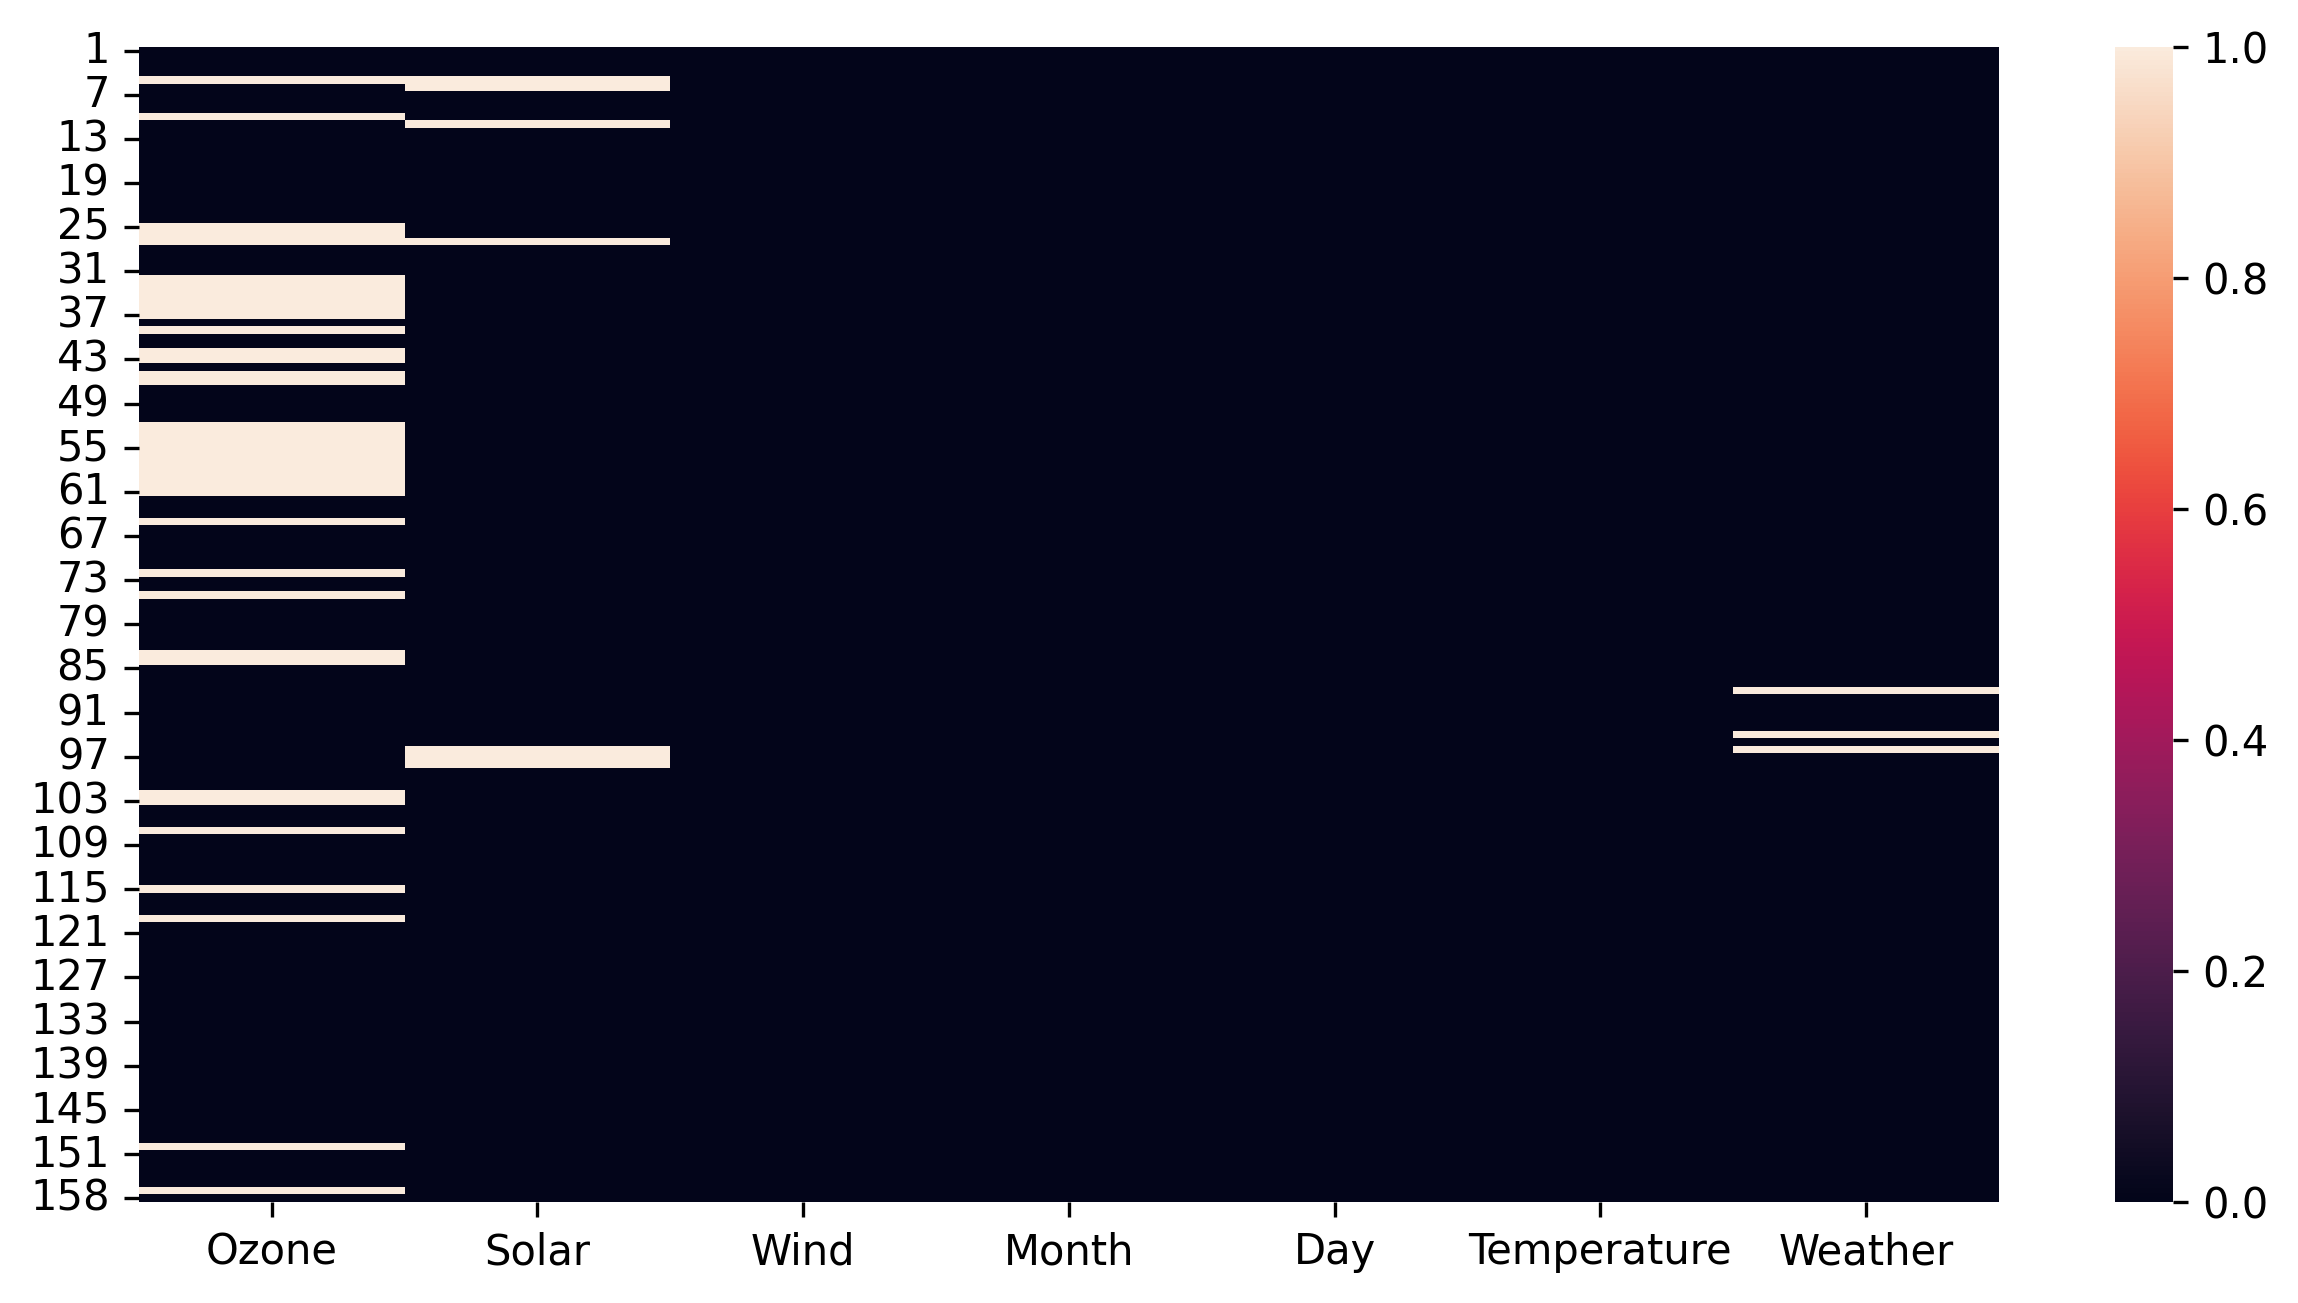

In [40]:
sns.heatmap(df.isna())

In [41]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [42]:
# 1%-5% Missing Value= Drop row
# 5%-50% Missing Value = Replace the value with either with Mean, Median or Mode
# More than 50% Missing Value = Drop Entire Row
# Outlier present use Median (Median is not affected by Outliers)
# Outlier not present use Mean (Mean is affected by Outliers)

In [43]:
38/157*100

24.203821656050955

In [44]:
for i in df.isna().sum():
    print((i/len(df)) * 100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


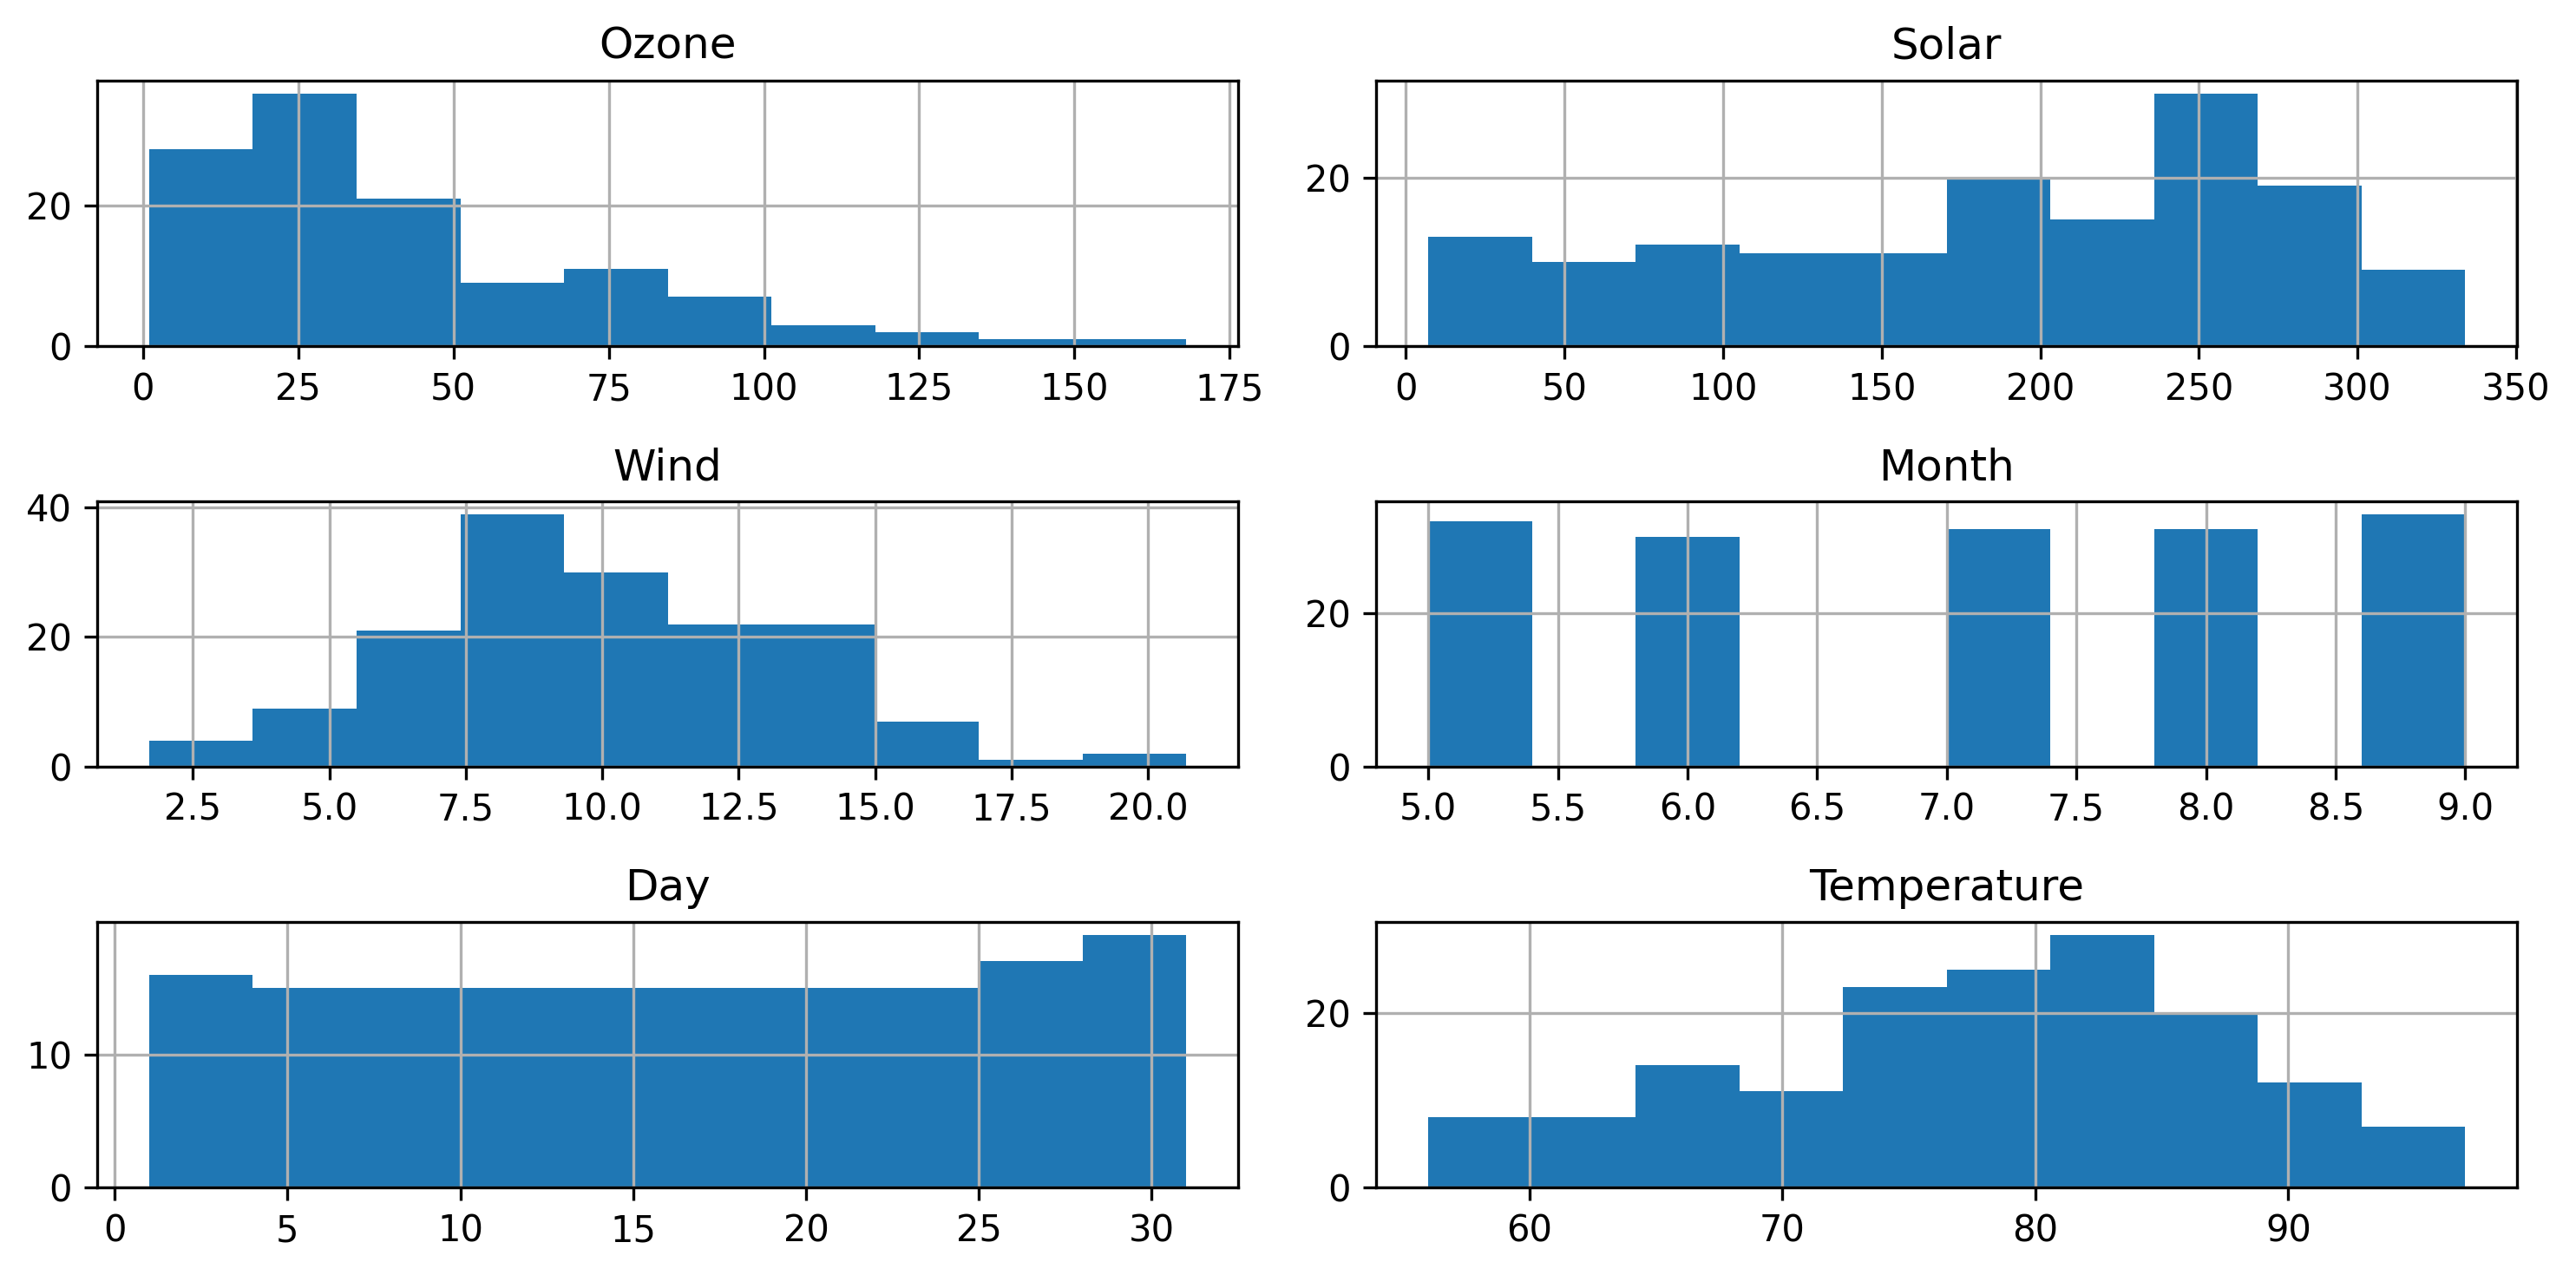

In [45]:
df.hist()
plt.tight_layout()

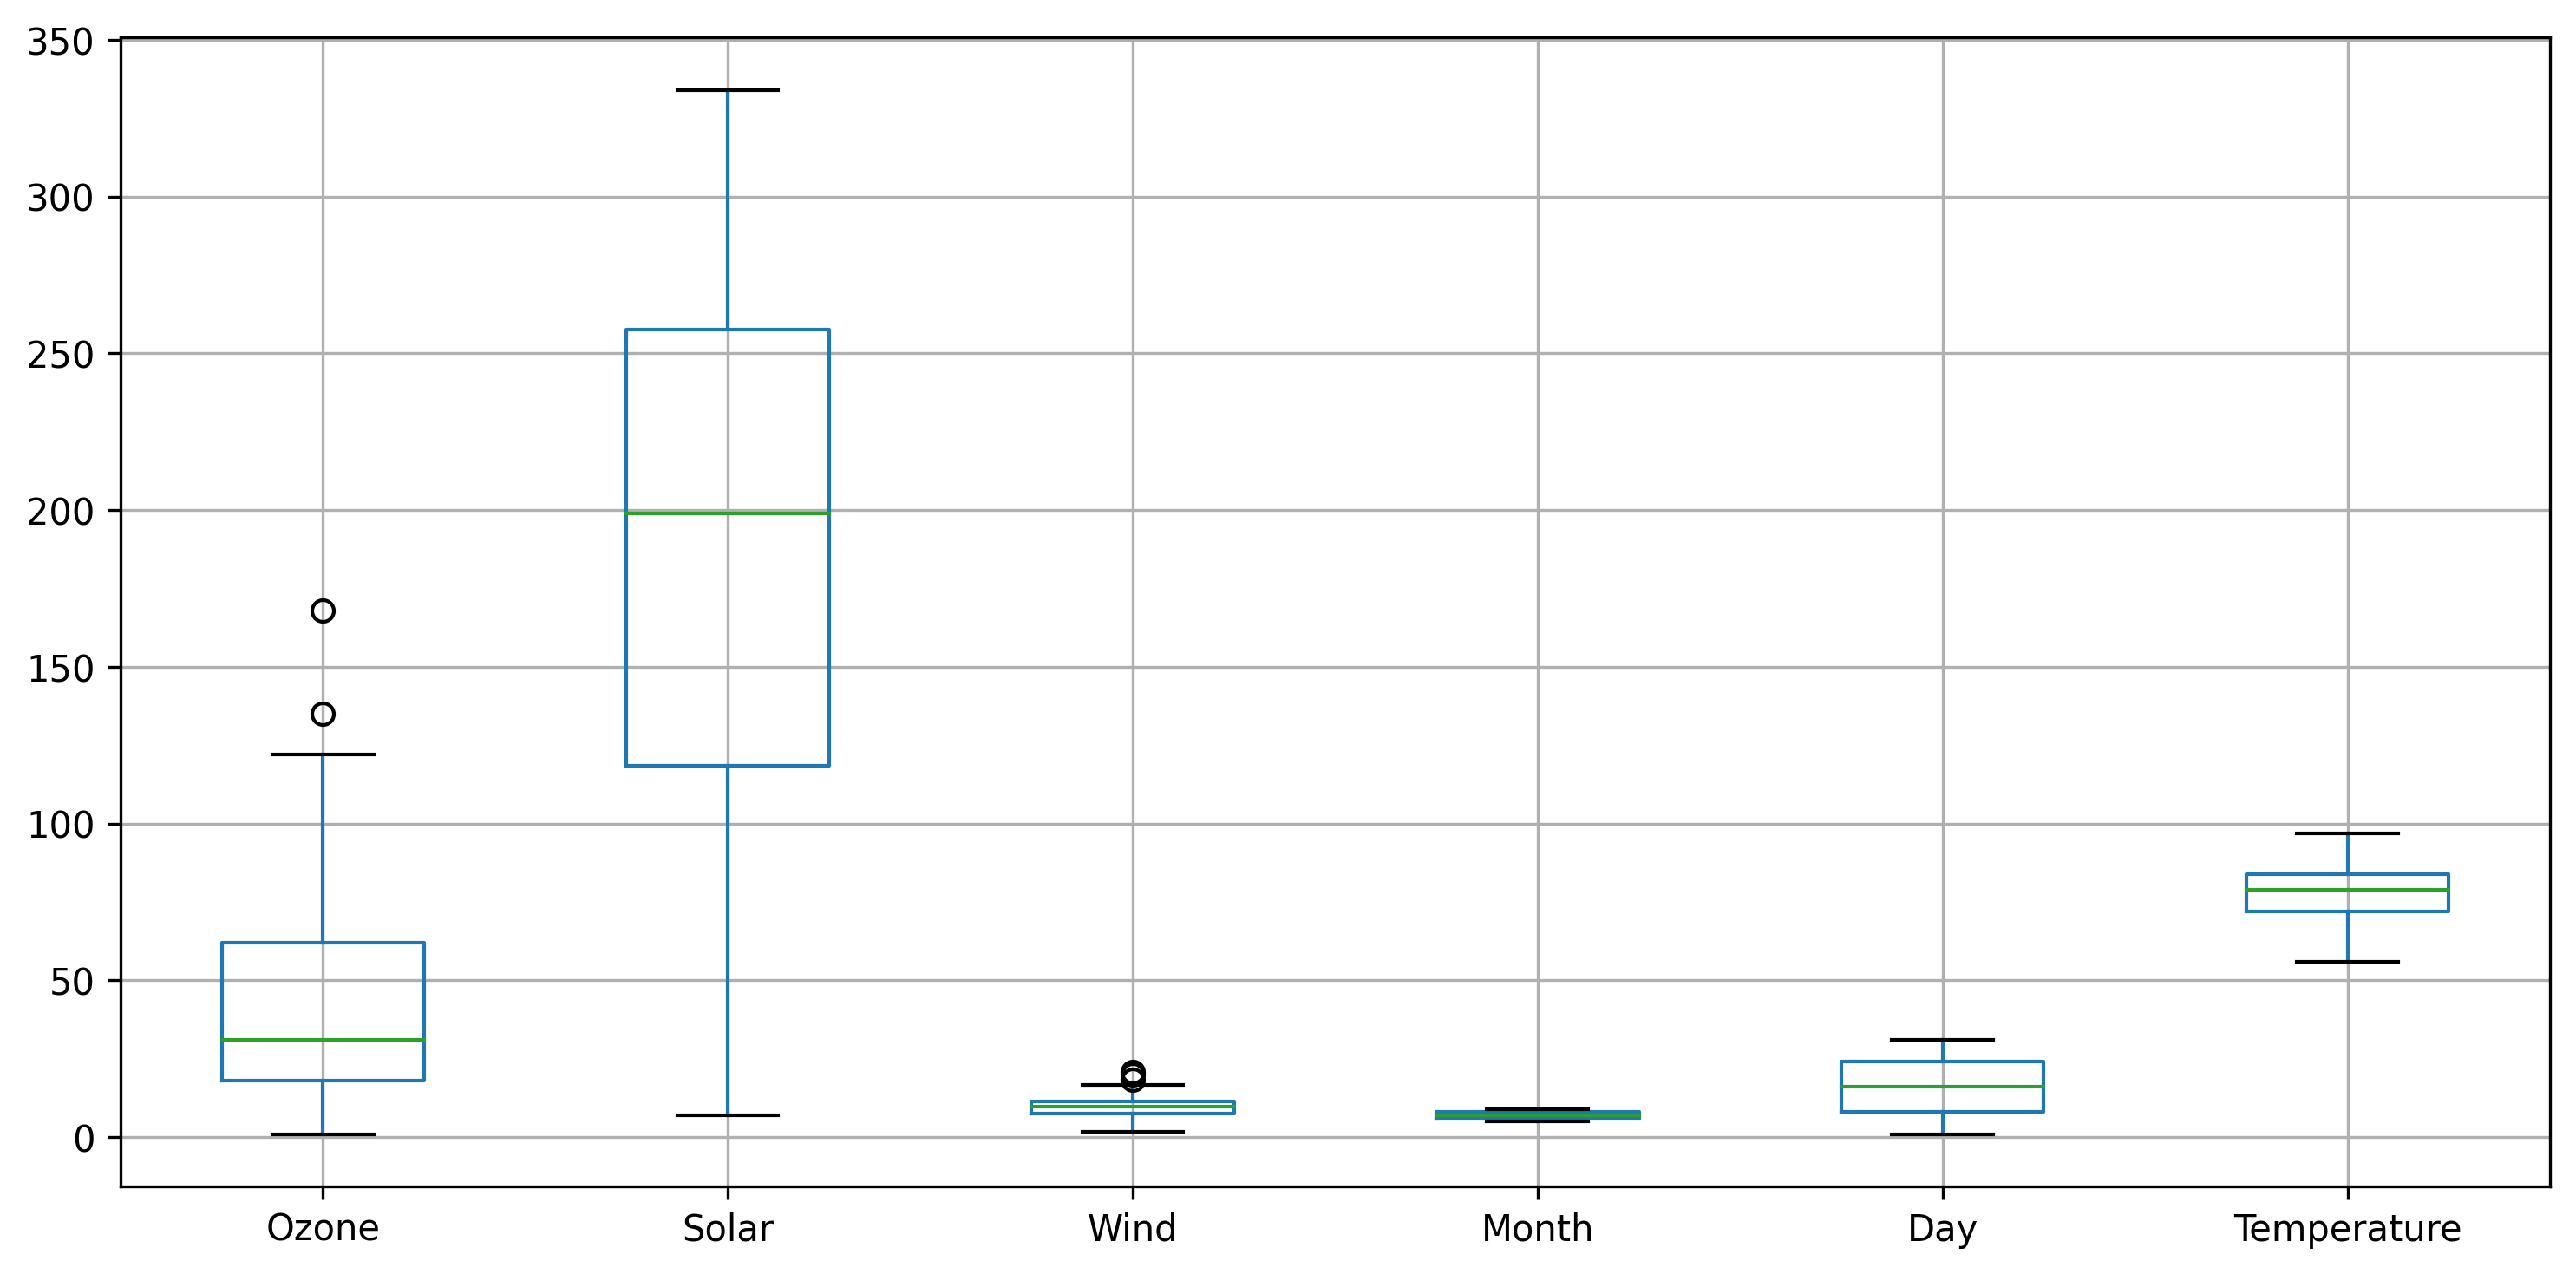

In [46]:
df.boxplot()
plt.tight_layout()

In [47]:
# Method 1
df['Ozone'].fillna(df['Ozone'].median(), inplace=True)

In [48]:
df.isna().sum()

Ozone          0
Solar          7
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [49]:
# Method 2 (by creating variable)
sol = df['Solar'].mean()
sol

185.36666666666667

In [50]:
df['Solar'].fillna(sol, inplace=True)

In [51]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [52]:
# filling missing value in category column we can only use MODE
df["Weather"].value_counts()

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

In [53]:
df["Weather"].mode()

0    S
Name: Weather, dtype: object

In [54]:
df["Weather"].mode()[0]

'S'

In [55]:
# We have to use .mode()[0] we cannot write .mode() it will not effect (We have to use index number)
# In some other cases we can have multiple mode so we have to use index number
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [56]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

In [57]:
# replaced the missing value

#### Outlier detection
- There are multiple approaches to detect outliers in the dataset.
- Histogram
- Boxplot
- Descriptive stats for df

In [58]:
df.describe()

Ozone       Solar        Wind       Month         Day  Temperature
count  157.000000  157.000000  157.000000  157.000000  157.000000   157.000000
mean    39.197452  185.366667    9.929936    7.019108   15.929936    77.745223
std     28.781992   86.998999    3.505188    1.434338    8.974404     9.405334
min      1.000000    7.000000    1.700000    5.000000    1.000000    56.000000
25%     21.000000  127.000000    7.400000    6.000000    8.000000    72.000000
50%     31.000000  193.000000    9.700000    7.000000   16.000000    79.000000
75%     45.000000  255.000000   11.500000    8.000000   24.000000    84.000000
max    168.000000  334.000000   20.700000    9.000000   31.000000    97.000000

In [59]:
df.hist()
plt.tight_layout()

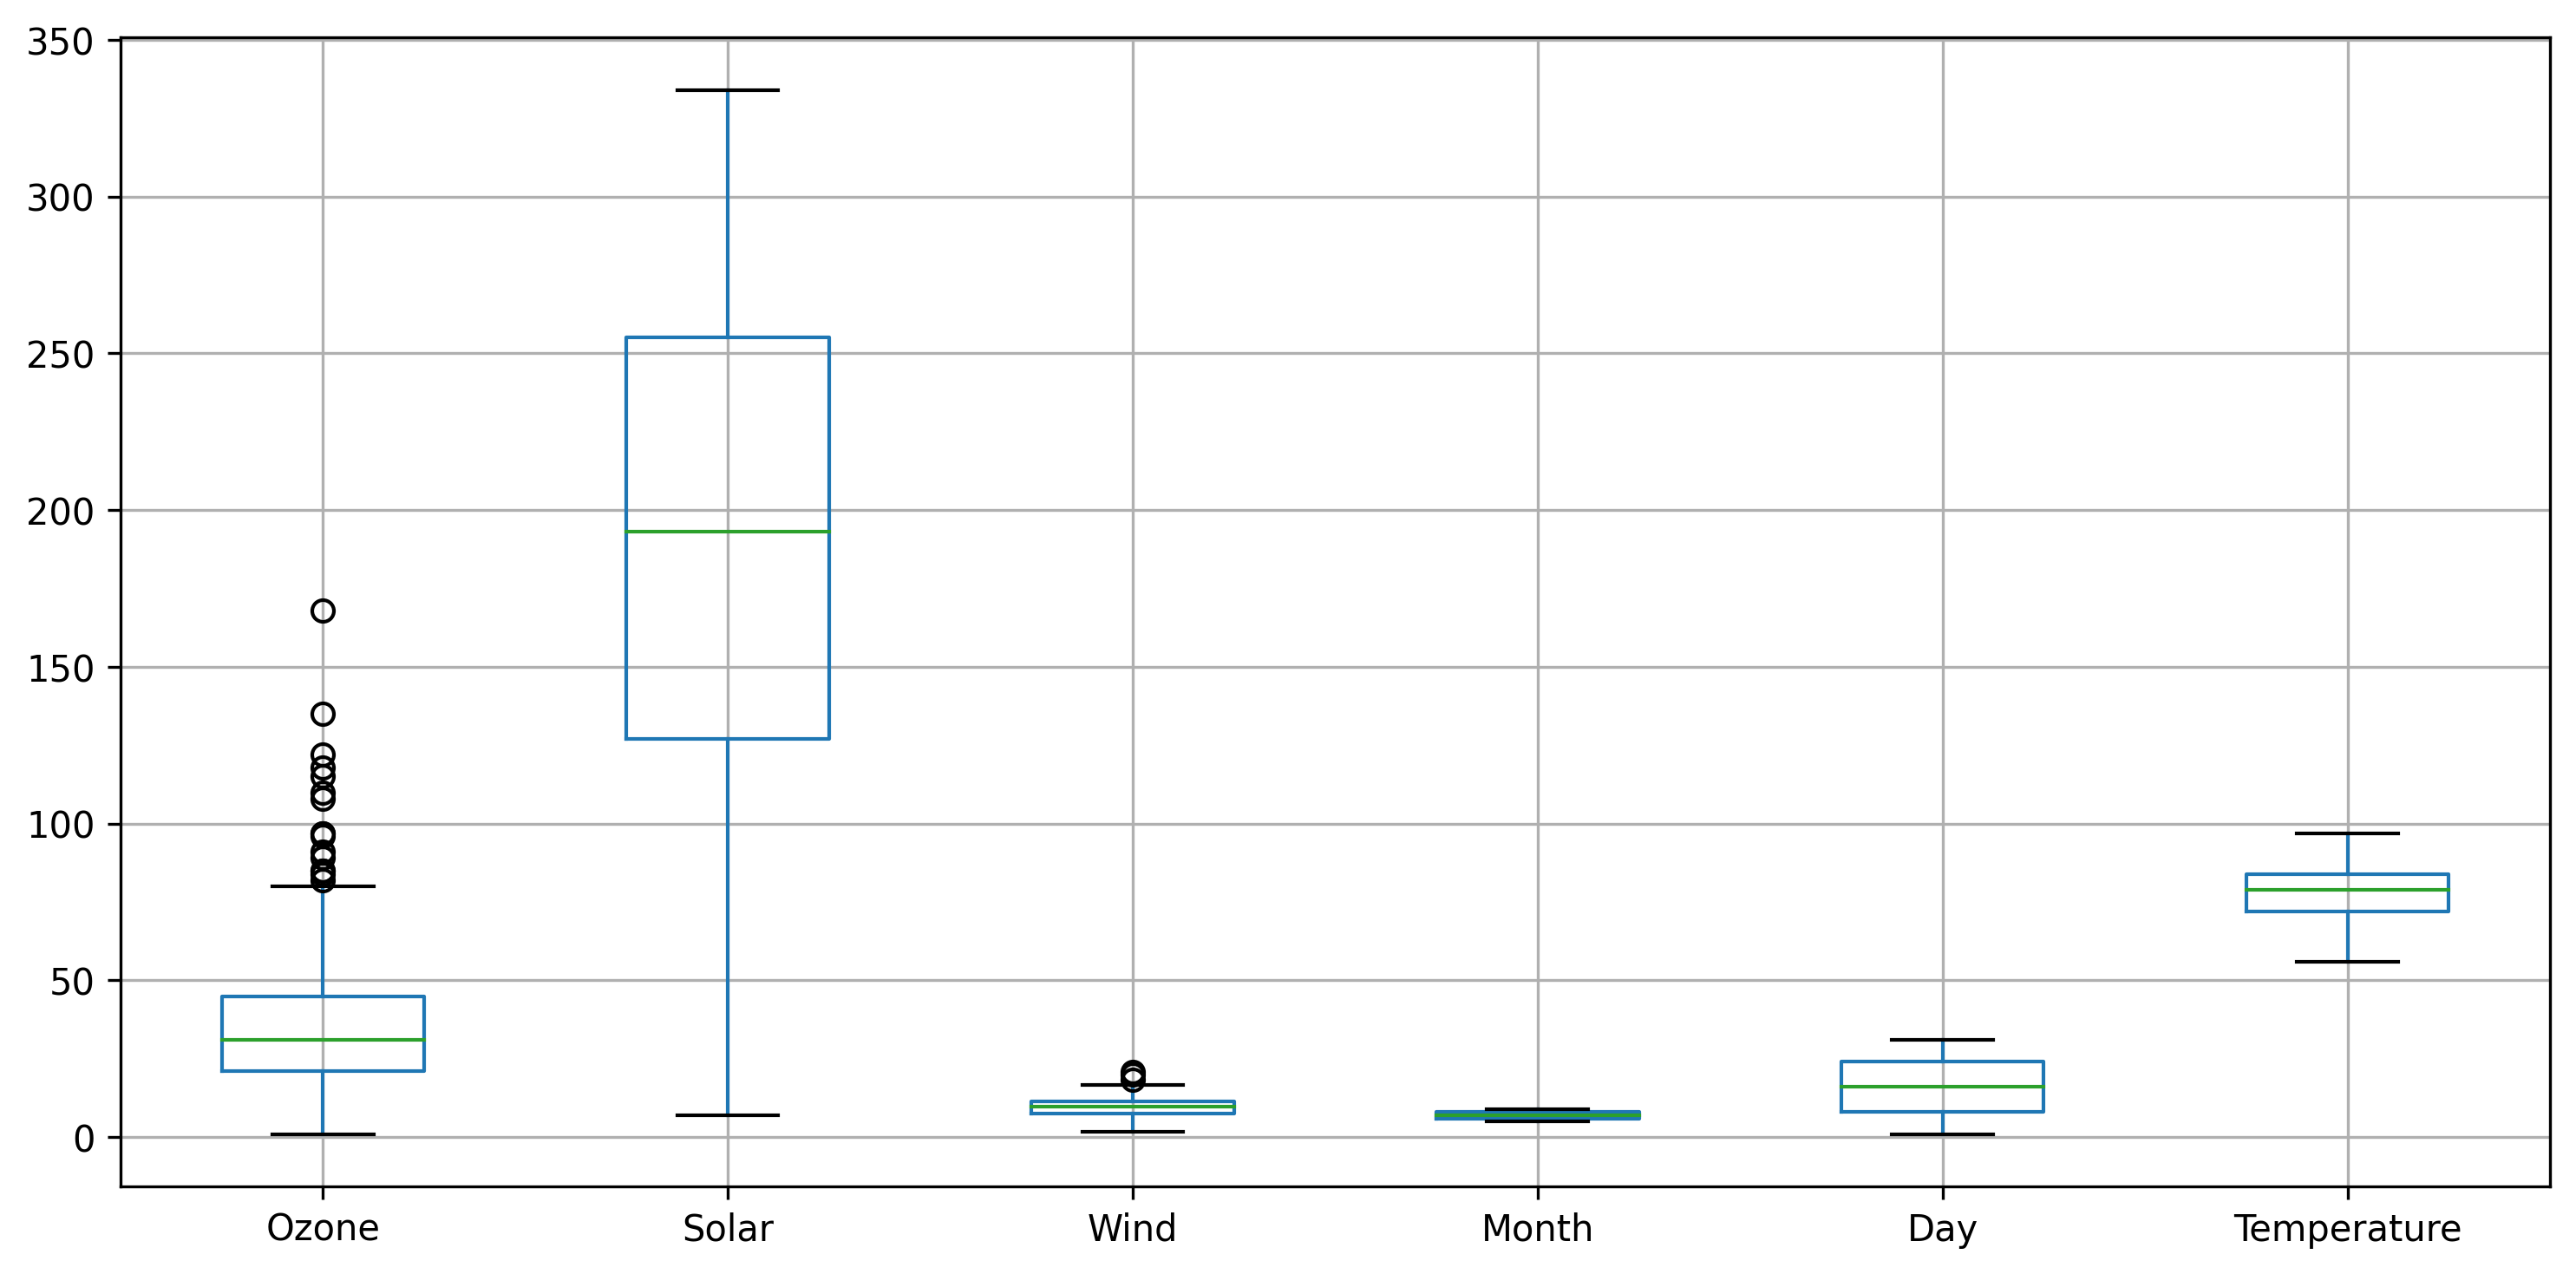

In [60]:
df.boxplot()
plt.tight_layout()

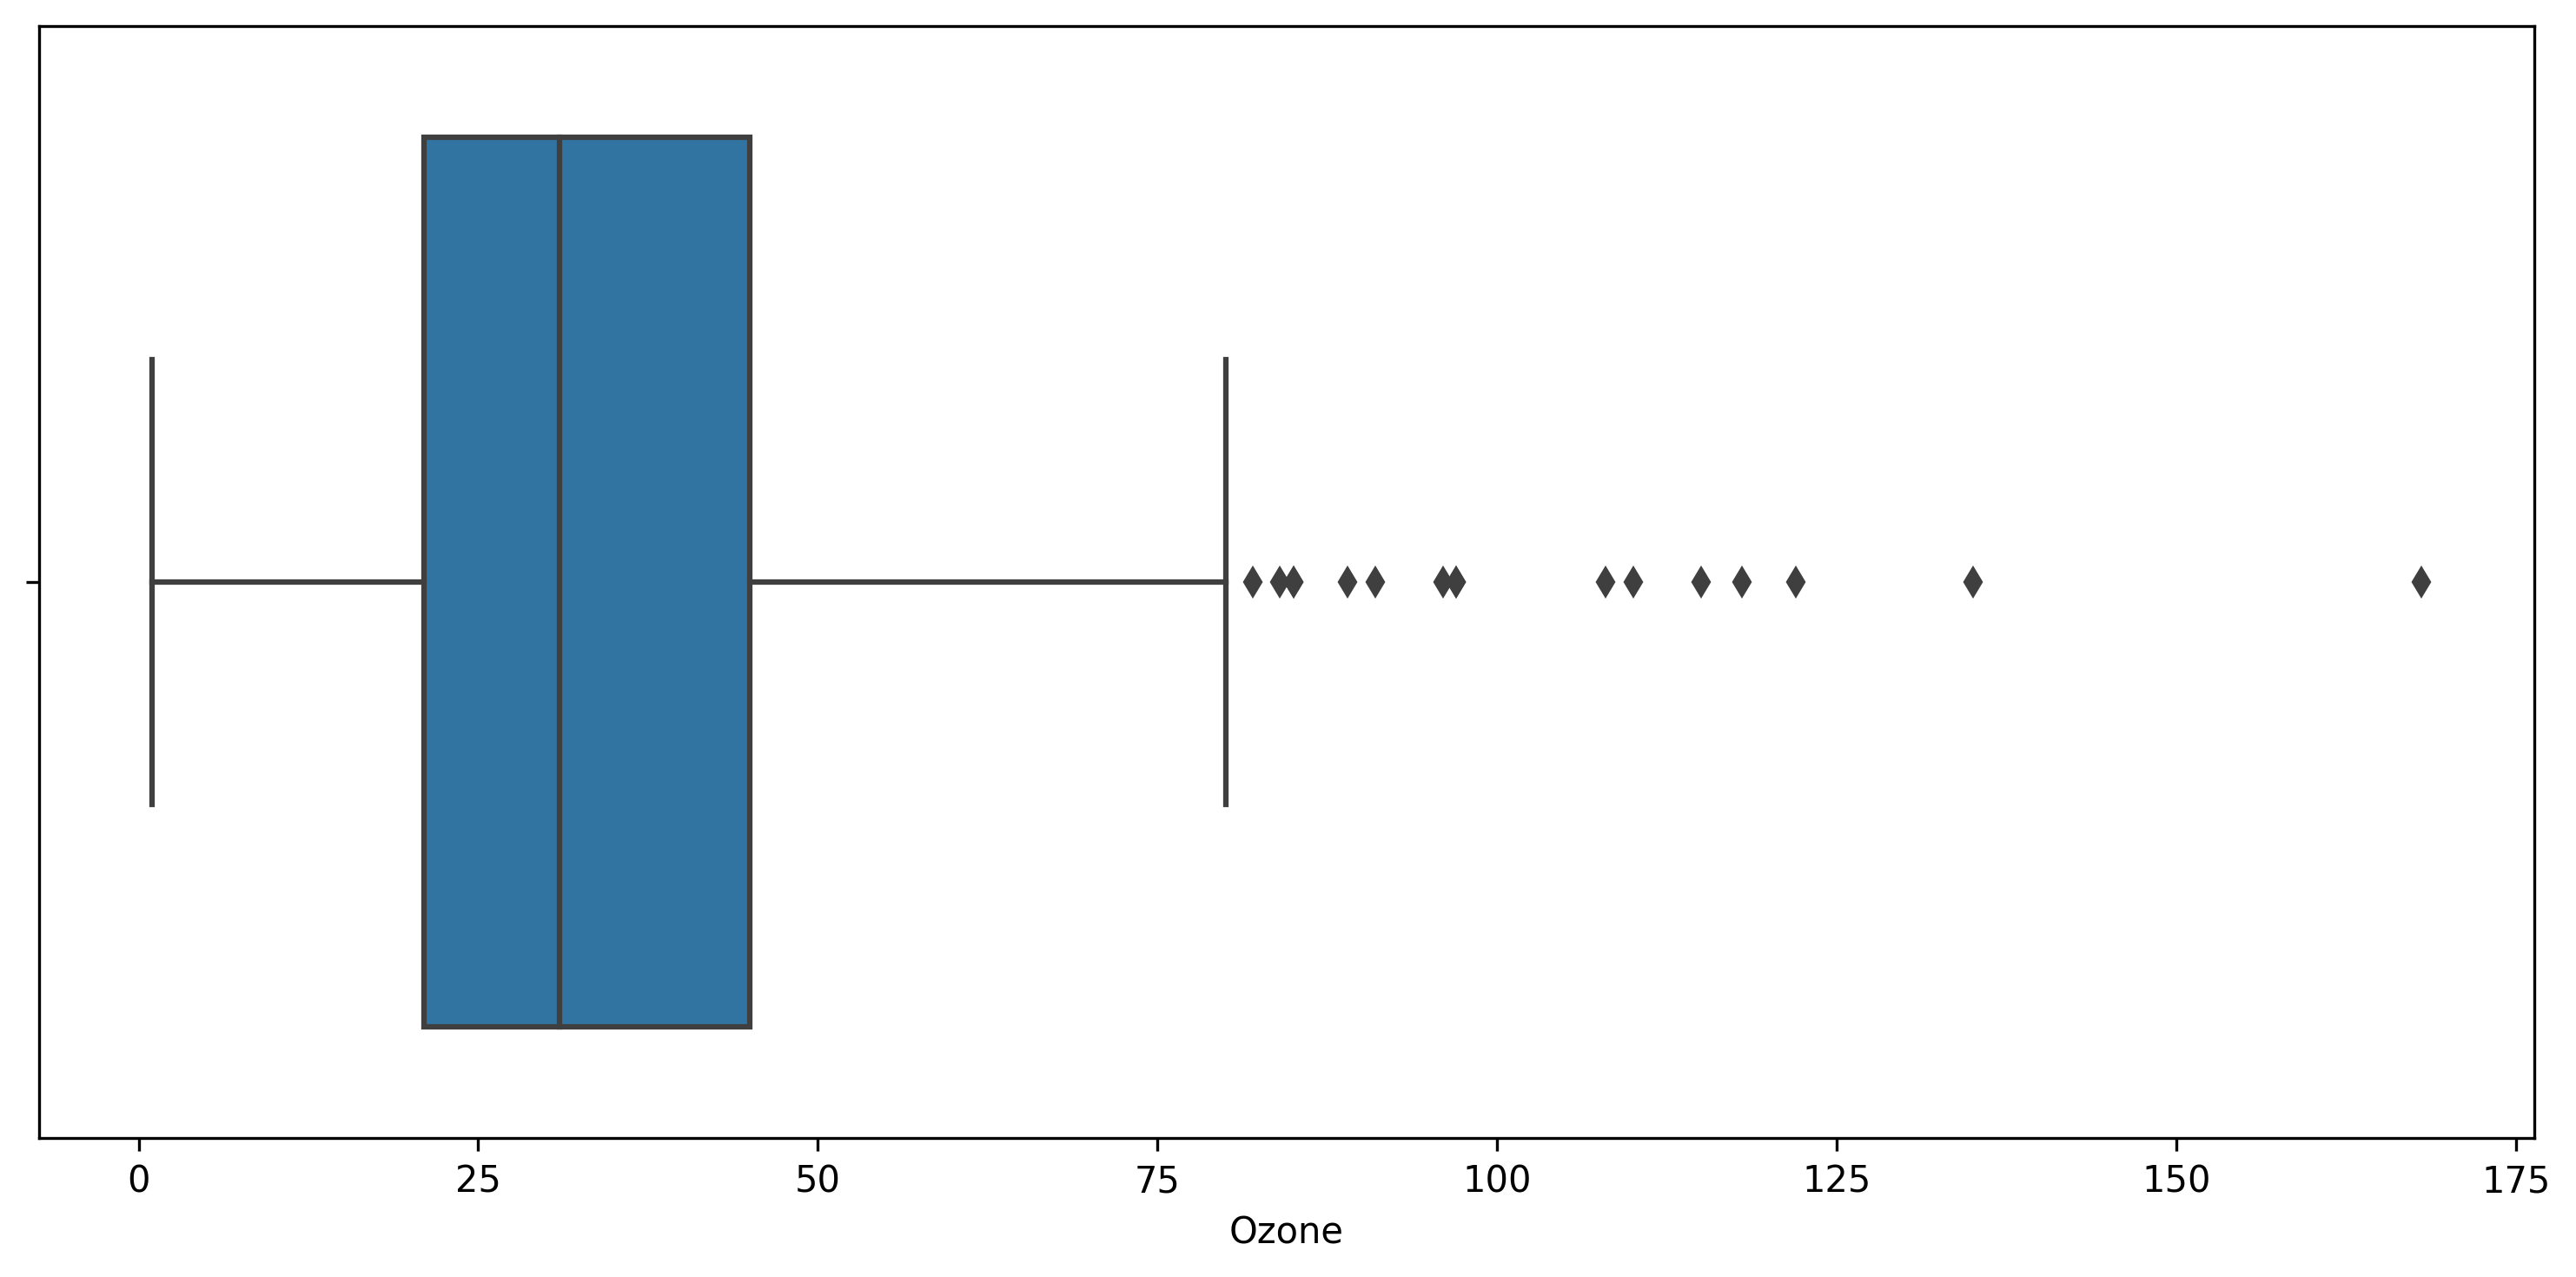

In [61]:
sns.boxplot(x= df["Ozone"])
plt.tight_layout()

In [62]:
# capping is if the outliers present above upper extreme we will replace outlies with upper extreme value
# capping is if the outliers present above lower extreme we will replace outlies with lower extreme value

In [63]:
# quantile(0.5) calculates the 50th percentile, which is the median.
# quantile(0.25) calculates the 25th percentile (Q1), dividing the data into the bottom 25% and the top 75%.
# quantile(0.75) calculates the 75th percentile (Q3), dividing the data into the bottom 75% and the top 25%.

In [64]:
# Outlier detection function for replacing outlier
# First we have to find upper extreme value and lower extreme value
# IQR stands for Interquartile Range, which is a measure of statistical dispersion and is used to describe the spread of a dataset. It is based on dividing a dataset into quartile
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1 # Interquartile Range formula
    upper = q3 + (1.5 * iqr) #upper extreme formula
    lower = q1 - (1.5 * iqr) #lower extreme formula
    return (f"The Lower Exterme value is ({lower}) and Upper Exterme value is ({upper}) for {colname} Column")

![IQR](iqr.png)

In [65]:
outlier_detection(df, "Ozone")

'The Lower Exterme value is (-15.0) and Upper Exterme value is (81.0) for Ozone Column'

In [66]:
outlier_detection(df, "Wind")

'The Lower Exterme value is (1.2500000000000009) and Upper Exterme value is (17.65) for Wind Column'

In [67]:
# The code df[df['Ozone'] > 81.0] filters a DataFrame df to retrieve rows where the 'Ozone' column values are greater than 81.0. 
# It returns a subset of the DataFrame containing only those rows where the condition ('Ozone' > 81.0) is true.
df[df['Ozone']> 81.0]

Ozone  Solar  Wind  Month  Day  Temperature Weather
30   115.0  223.0   5.7      5   30           79       C
62   135.0  269.0   4.1      7    1           84       S
69    97.0  267.0   6.3      7    8           92      PS
70    97.0  272.0   5.7      7    9           92       C
71    85.0  175.0   7.4      7   10           89      PS
86   108.0  223.0   8.0      7   25           85      PS
89    82.0  213.0   7.4      7   28           88       S
99   122.0  255.0   4.0      8    7           89       C
100   89.0  229.0  10.3      8    8           90      PS
101  110.0  207.0   8.0      8    9           90       C
117  168.0  238.0   3.4      8   25           81      PS
121  118.0  225.0   2.3      8   29           94       S
122   84.0  237.0   6.3      8   30           96       S
123   85.0  188.0   6.3      8   31           94       C
124   96.0  167.0   6.9      9    1           91       C
127   91.0  189.0   4.6      9    4           93      PS

In [68]:
# The expression len(df[df['Ozone']> 81.0]) calculates the length (number of rows) of a subset of the DataFrame df where the values in the 
#'Ozone' column are greater than 81.0. 
# It counts the number of rows that satisfy the condition 'Ozone' > 81.0 and returns the count as an integer value.
len(df[df['Ozone']> 81.0])

16

In [69]:
# df.loc[       row ,     column]
df.loc[df['Ozone']> 81 , 'Ozone']

30     115.0
62     135.0
69      97.0
70      97.0
71      85.0
86     108.0
89      82.0
99     122.0
100     89.0
101    110.0
117    168.0
121    118.0
122     84.0
123     85.0
124     96.0
127     91.0
Name: Ozone, dtype: float64

In [70]:
#Capping outliers
df.loc[df['Ozone']> 81 , 'Ozone'] = 81.0

<Axes: xlabel='Ozone'>

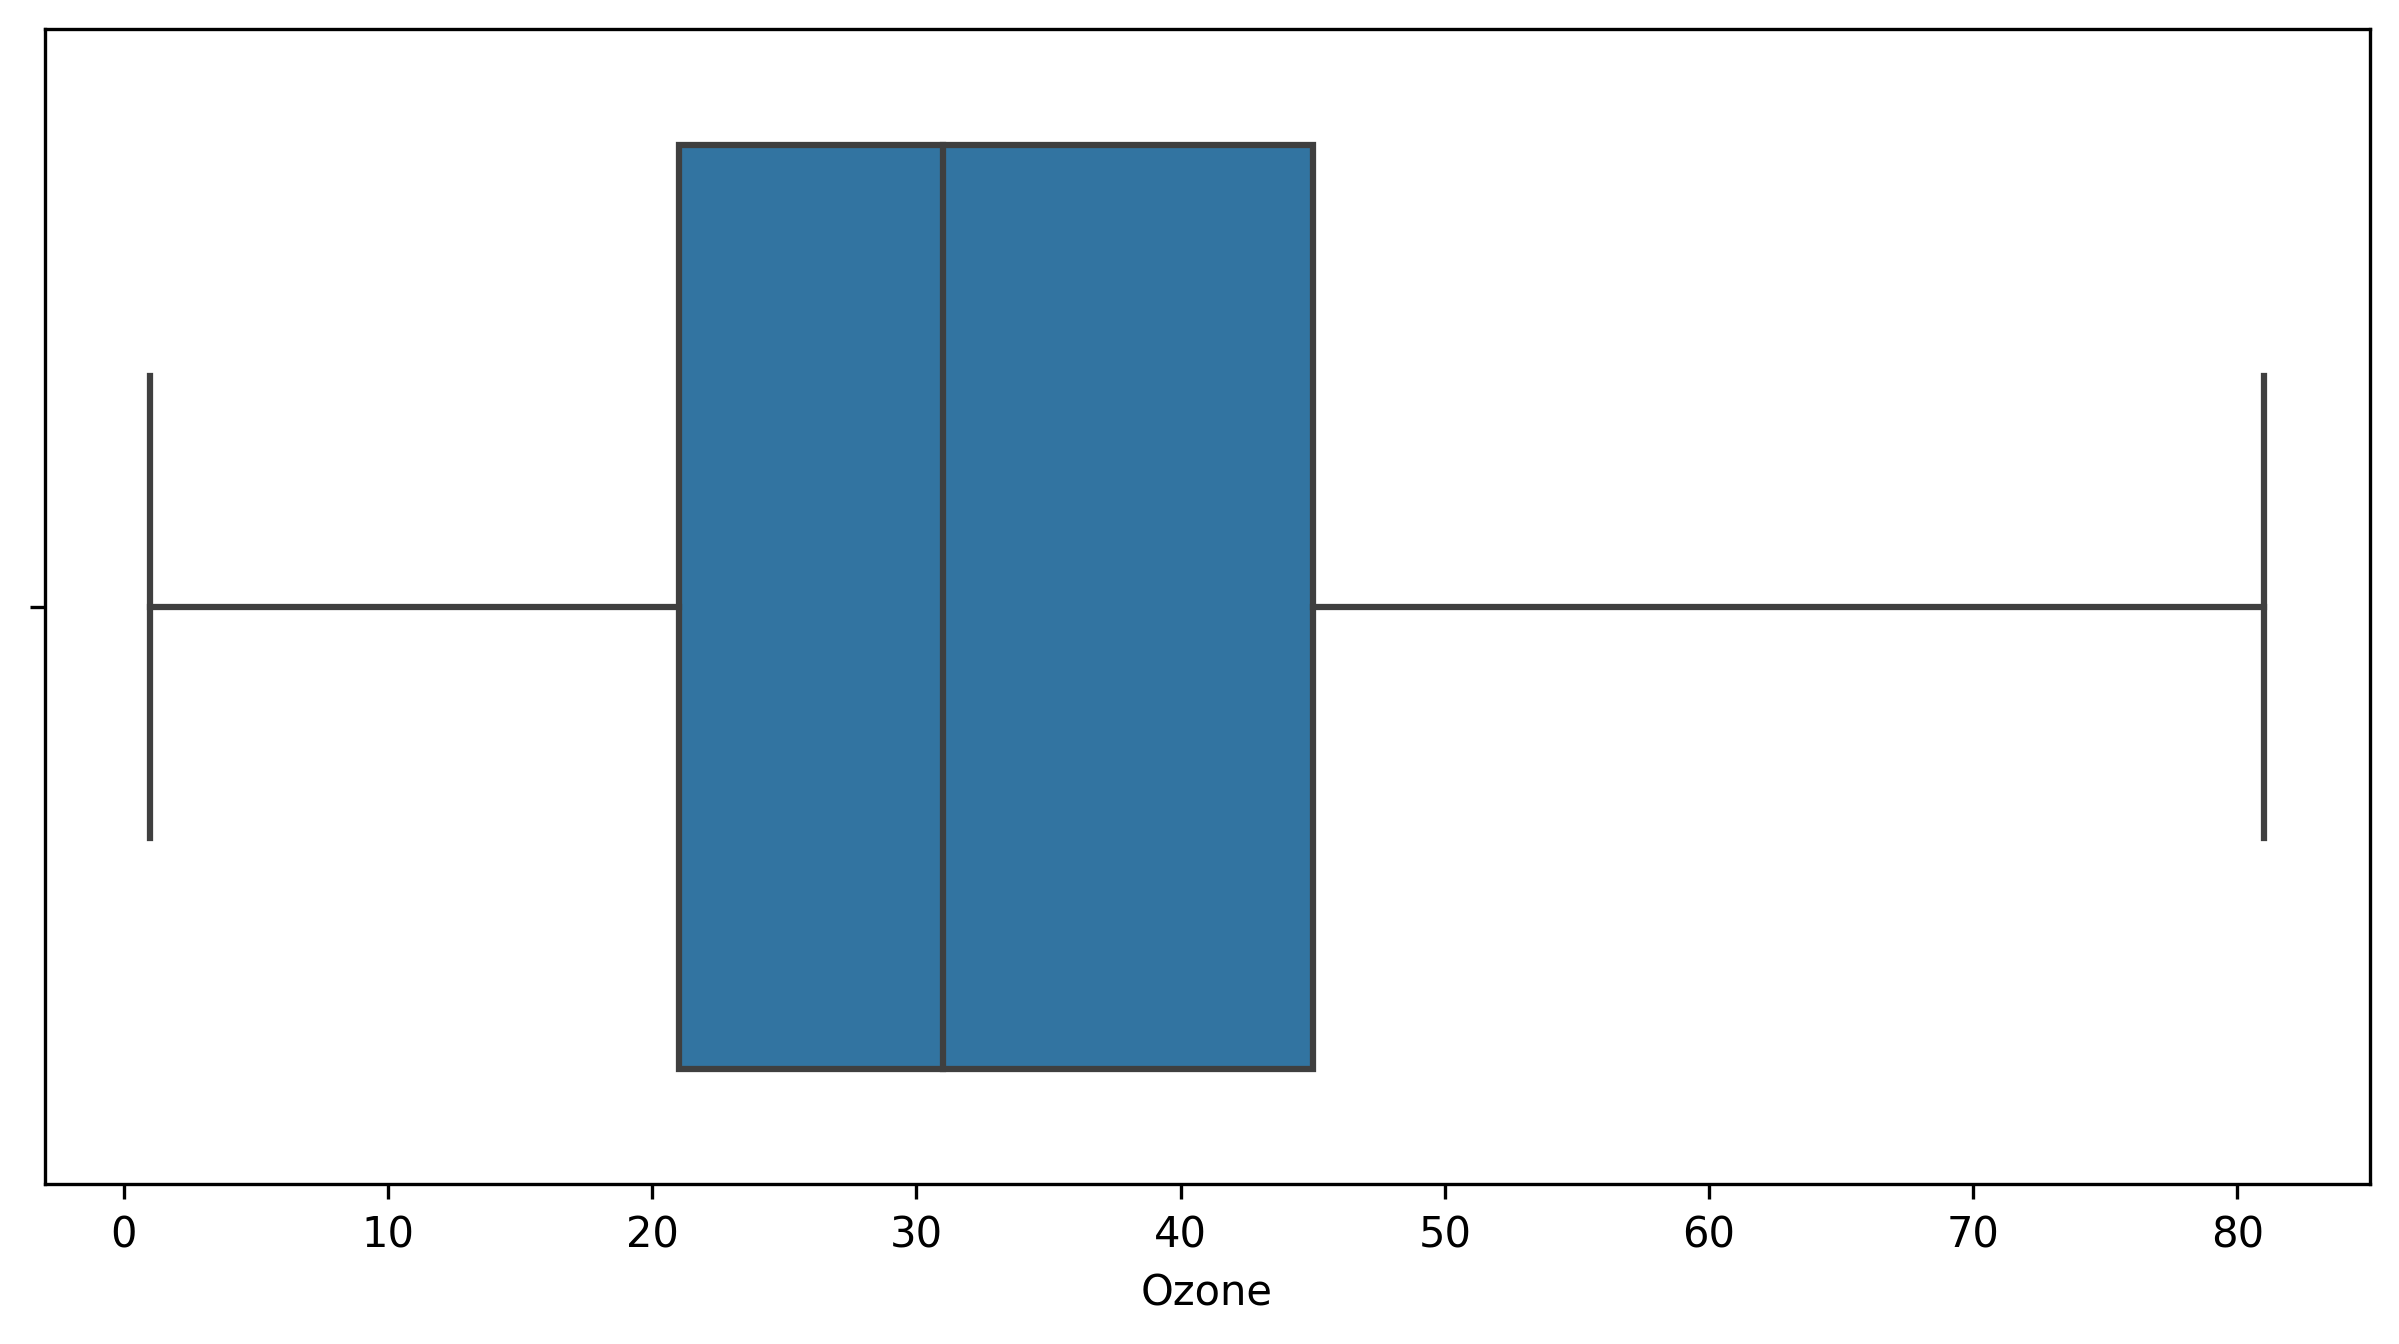

In [71]:
sns.boxplot(x = df['Ozone'])

In [72]:
outlier_detection(df, "Wind")

'The Lower Exterme value is (1.2500000000000009) and Upper Exterme value is (17.65) for Wind Column'

<Axes: xlabel='Wind'>

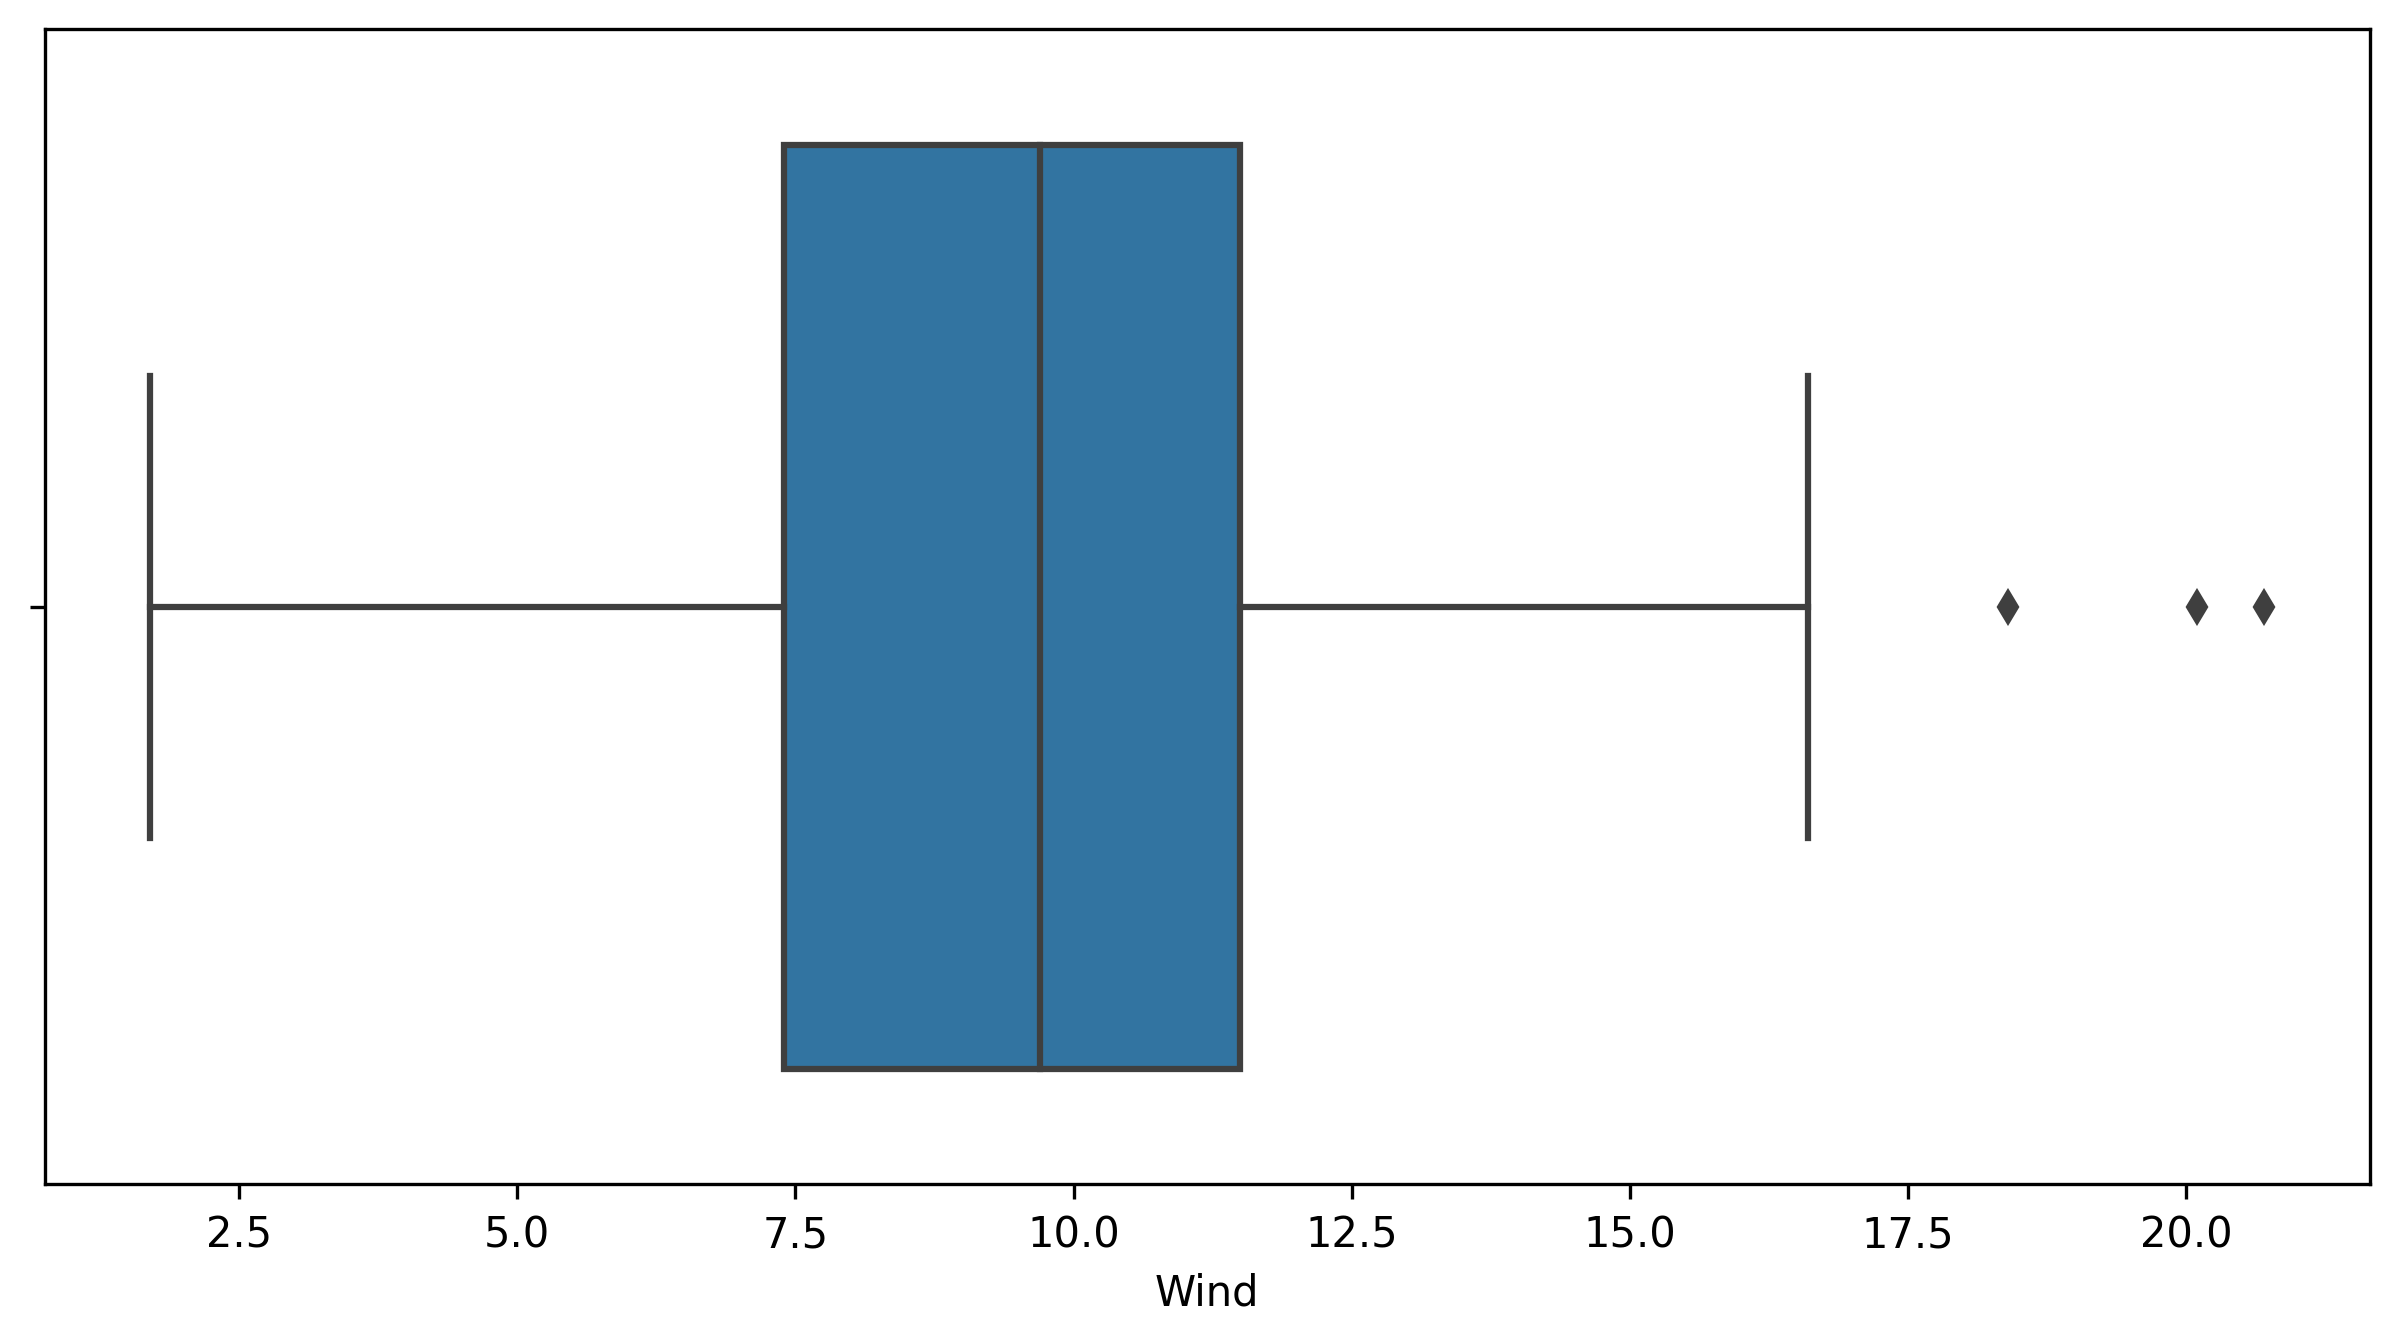

In [73]:
sns.boxplot(x = df['Wind'])

In [74]:
df[df["Wind"]> 17.65]

Ozone  Solar  Wind  Month  Day  Temperature Weather
9     8.0   19.0  20.1      5    9           61      PS
18    6.0   78.0  18.4      5   18           57       C
48   37.0  284.0  20.7      6   17           72       C

In [75]:
len(df[df["Wind"]> 17.65])

3

In [76]:
df.loc[df["Wind"]> 17.65, "Wind"]

9     20.1
18    18.4
48    20.7
Name: Wind, dtype: float64

In [77]:
# We replaaced the df["Ozone"] outliers with the upper extreme value
# But For df["Wind"] outliers we will delete the outliers

In [78]:
# Selecting only normal data points (Method 1)
# data = df[df["Wind"] < 17.65]
# data

In [79]:
# Replacing the df["Wind"] outliers with the upper extreme value
df.loc[df["Wind"]>17.65, "Wind"] = 17.65

<Axes: >

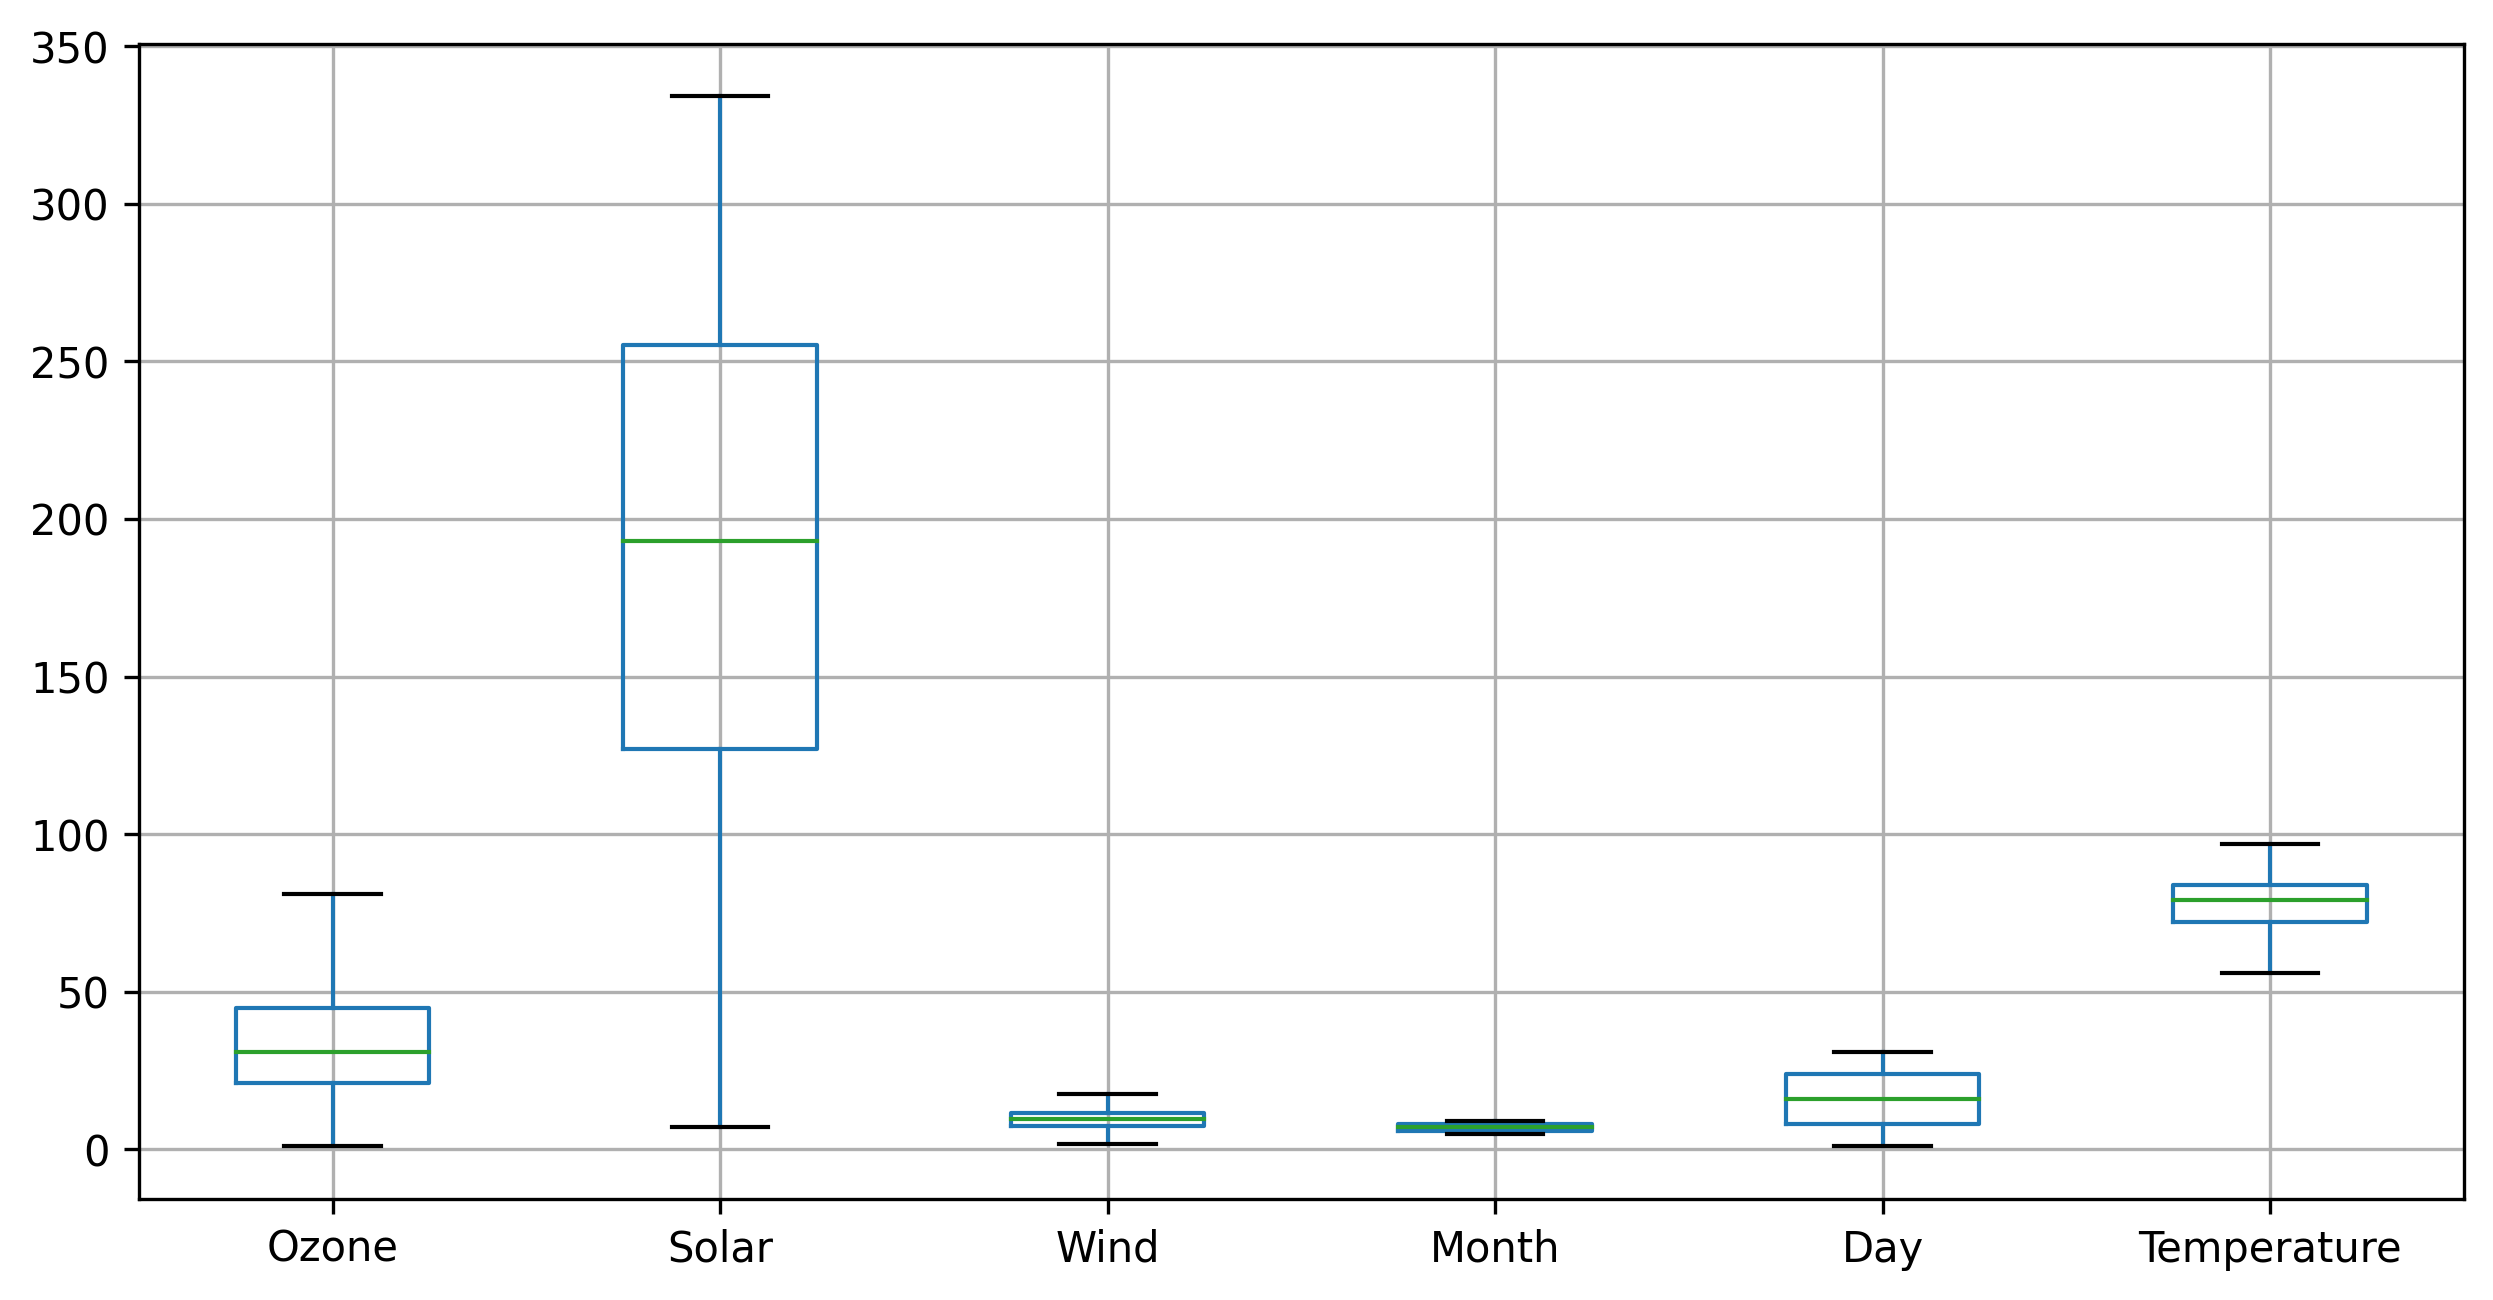

In [80]:
df.boxplot()

<Axes: xlabel='Wind'>

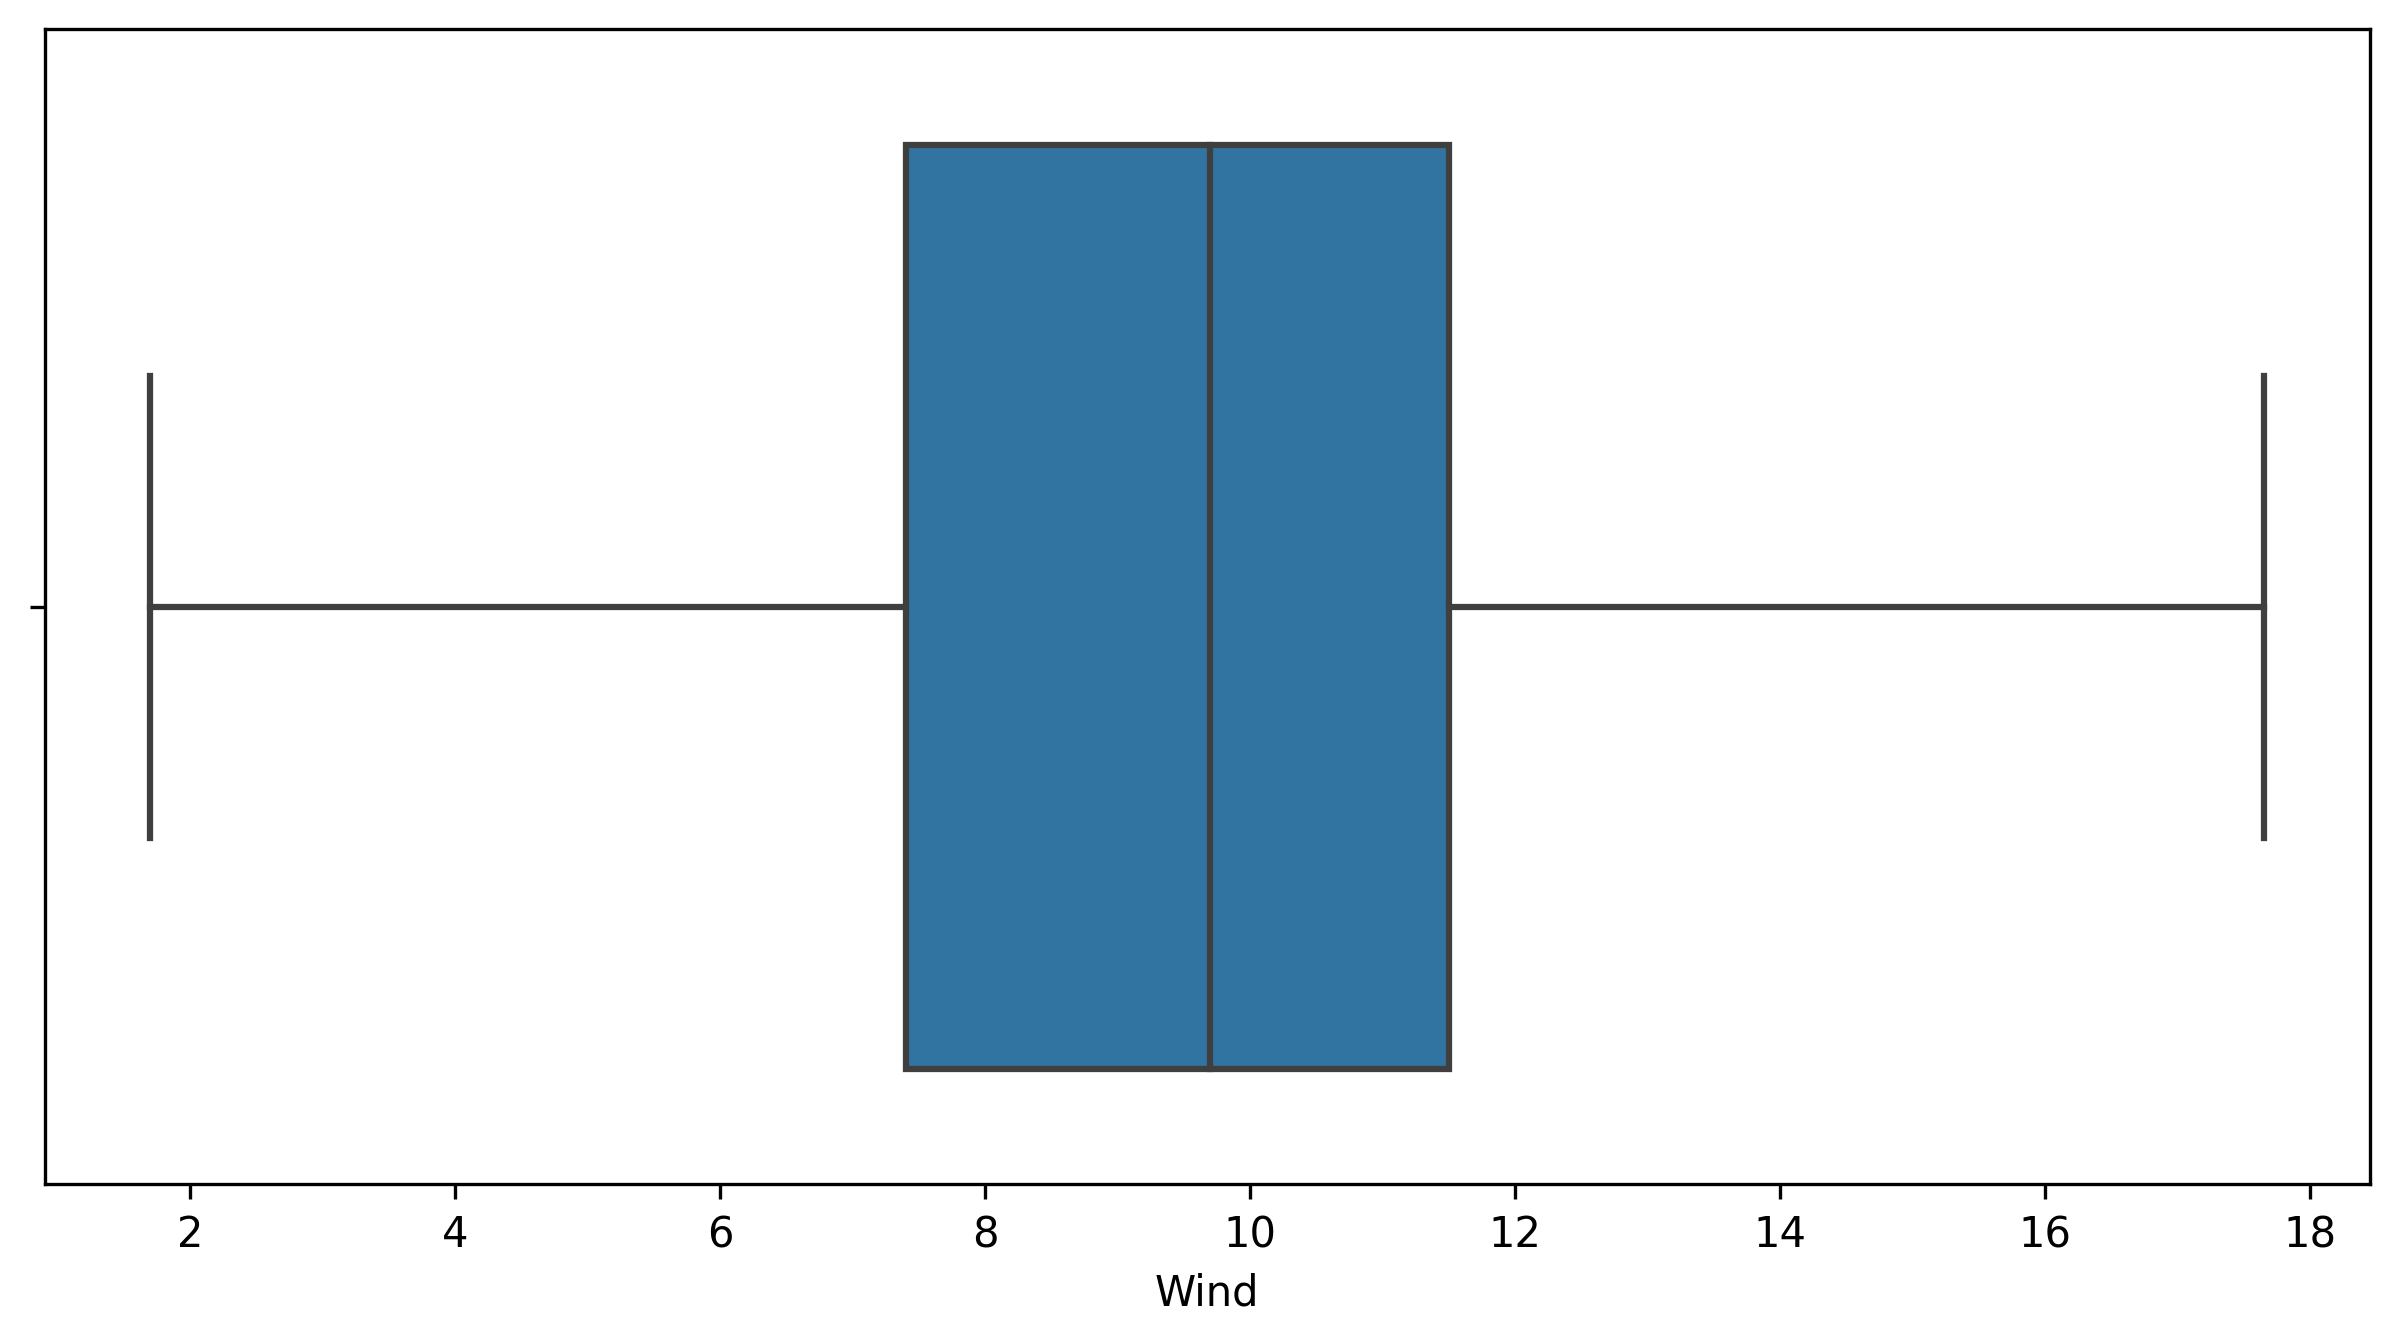

In [81]:
sns.boxplot(x = df["Wind"])

#### Scatter Plot and Correlation

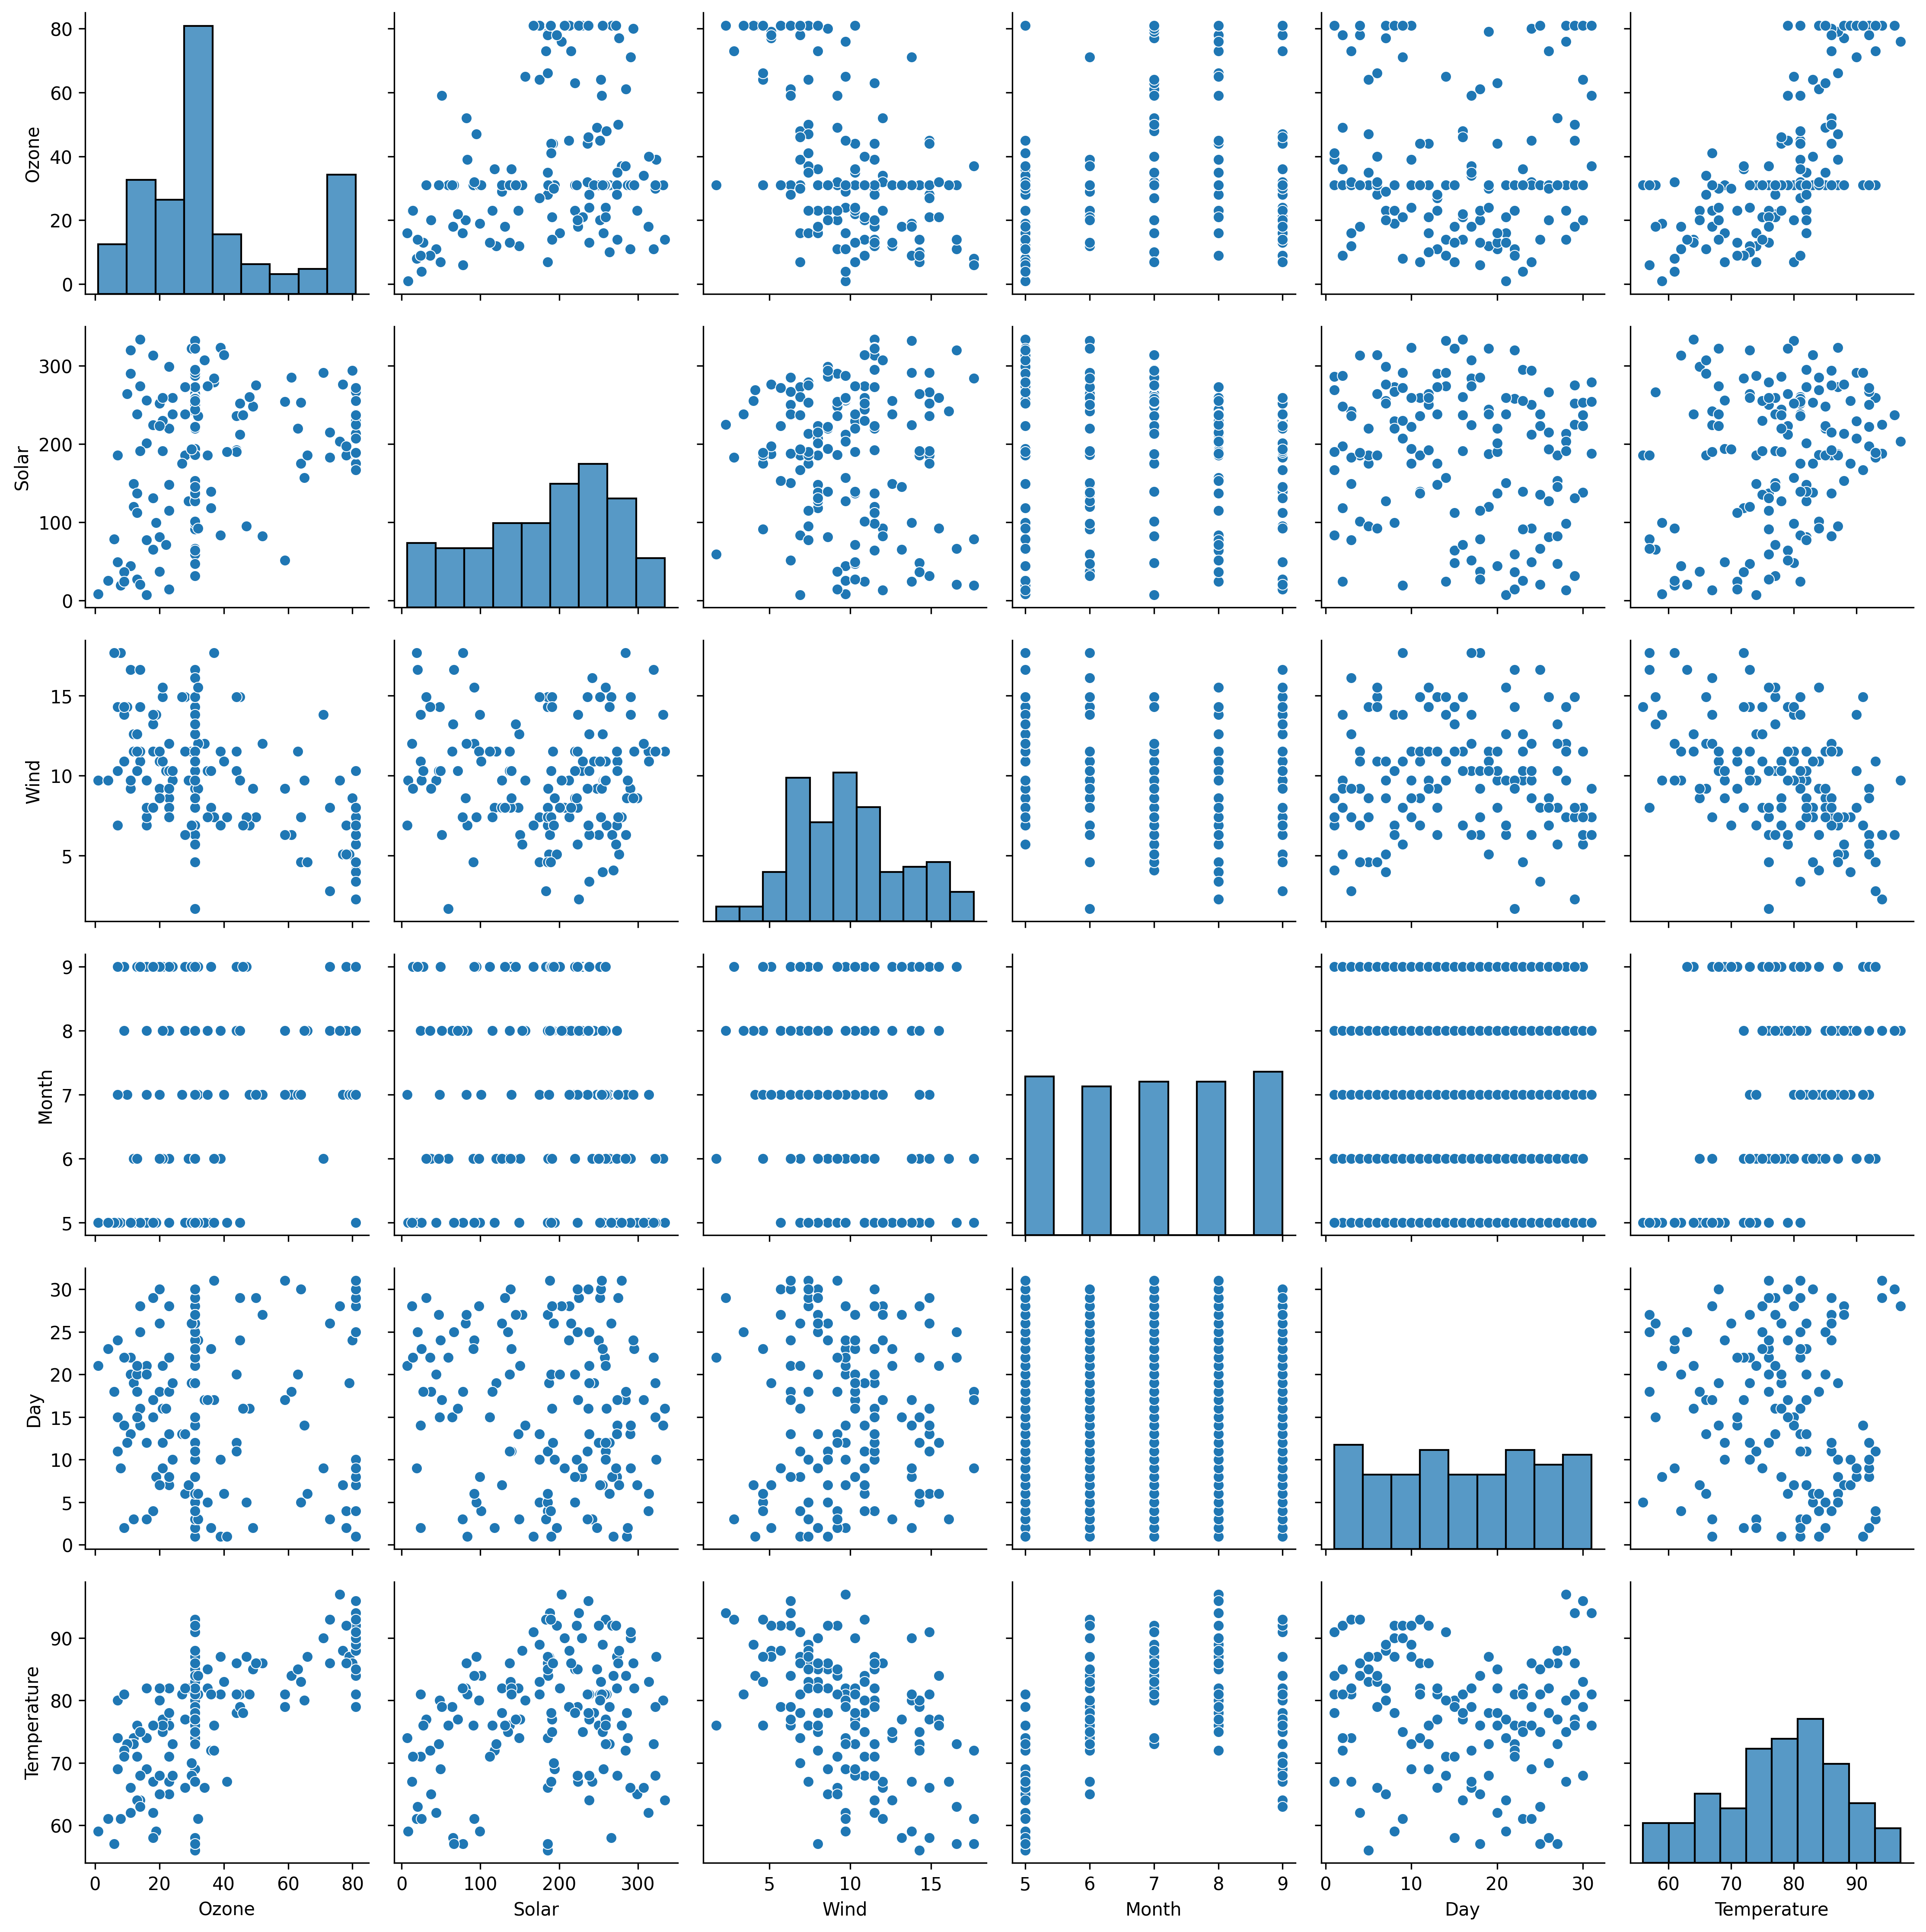

In [82]:
sns.pairplot(df)
plt.tight_layout()

In [83]:
#Correlation Coefficient df.corr()

In [84]:
# By default numeric_only=False, we have to set it to true if we have any categarical column 
df.corr(numeric_only=True)

Ozone     Solar      Wind     Month       Day  Temperature
Ozone        1.000000  0.317926 -0.522513  0.183089 -0.042835     0.662773
Solar        0.317926  1.000000 -0.053534 -0.080237 -0.151007     0.260677
Wind        -0.522513 -0.053534  1.000000 -0.162988  0.033374    -0.439939
Month        0.183089 -0.080237 -0.162988  1.000000  0.041438     0.408060
Day         -0.042835 -0.151007  0.033374  0.041438  1.000000    -0.122787
Temperature  0.662773  0.260677 -0.439939  0.408060 -0.122787     1.000000

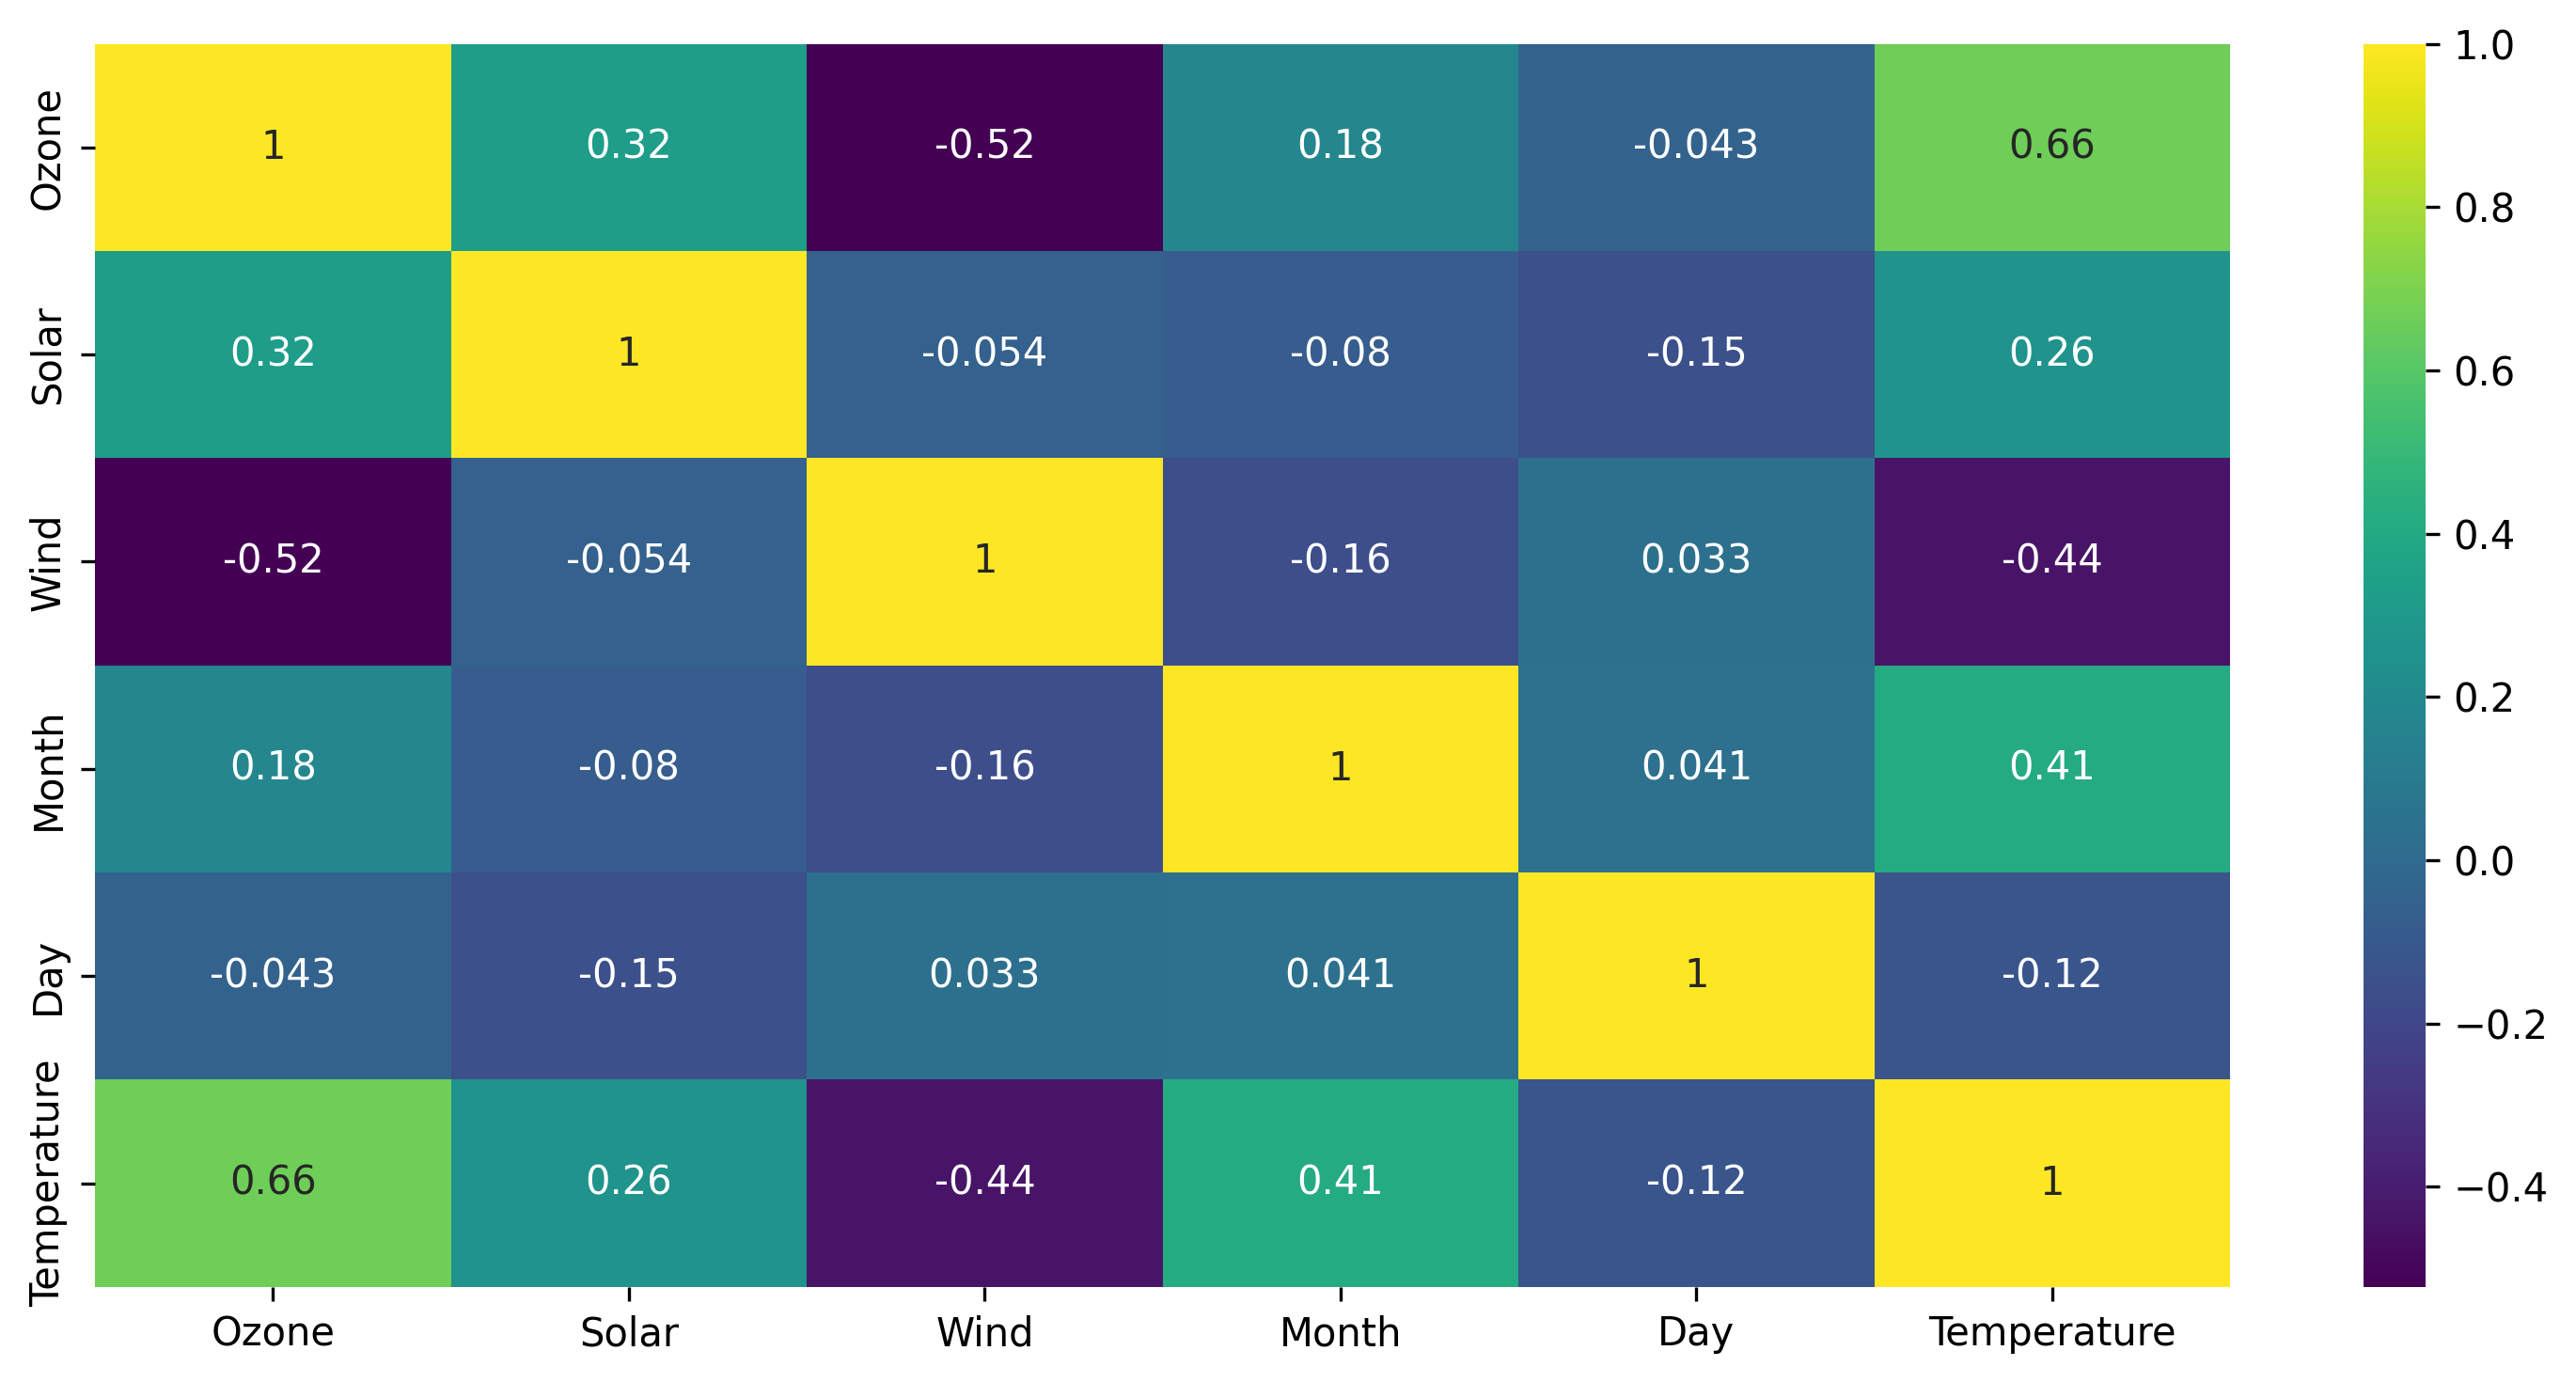

In [85]:
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True)
# To print the correlation cofficient value on heat map we use (annot=True)
plt.tight_layout()
# 1 indicates a perfect positive linear relationship.
# -1 indicates a perfect negative linear relationship.
# 0 indicates no linear relationship.

#### Transformations
- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [86]:
 df.head()
# We have one categorical column ("Weather")

Ozone       Solar  Wind  Month  Day  Temperature Weather
1   41.0  190.000000   7.4      5    1           67       S
2   36.0  118.000000   8.0      5    2           72       C
3   12.0  149.000000  12.6      5    3           74      PS
4   18.0  313.000000  11.5      5    4           62       S
5   31.0  185.366667  14.3      5    5           56       S

In [87]:
# We will convert the Weather coln into numerical coln (dtype=int) for integer
pd.get_dummies(data= df, columns=["Weather"], dtype=int)

Ozone       Solar  Wind  Month  Day  Temperature  Weather_C  Weather_PS  \
1     41.0  190.000000   7.4      5    1           67          0           0   
2     36.0  118.000000   8.0      5    2           72          1           0   
3     12.0  149.000000  12.6      5    3           74          0           1   
4     18.0  313.000000  11.5      5    4           62          0           0   
5     31.0  185.366667  14.3      5    5           56          0           0   
..     ...         ...   ...    ...  ...          ...        ...         ...   
153   20.0  223.000000  11.5      9   30           68          0           0   
154   41.0  190.000000   7.4      5    1           67          1           0   
155   30.0  193.000000   6.9      9   26           70          0           1   
156   31.0  145.000000  13.2      9   27           77          0           0   
158   18.0  131.000000   8.0      9   29           76          1           0   

     Weather_S  
1            1  
2            0  
3            0  
4            1  
5            1  
..         ...  
153          1  
154          0  
155          0  
156          1  
158          0  

[157 rows x 9 columns]

In [88]:
df= pd.get_dummies(data= df, columns=["Weather"], dtype=int)

In [89]:
df

Ozone       Solar  Wind  Month  Day  Temperature  Weather_C  Weather_PS  \
1     41.0  190.000000   7.4      5    1           67          0           0   
2     36.0  118.000000   8.0      5    2           72          1           0   
3     12.0  149.000000  12.6      5    3           74          0           1   
4     18.0  313.000000  11.5      5    4           62          0           0   
5     31.0  185.366667  14.3      5    5           56          0           0   
..     ...         ...   ...    ...  ...          ...        ...         ...   
153   20.0  223.000000  11.5      9   30           68          0           0   
154   41.0  190.000000   7.4      5    1           67          1           0   
155   30.0  193.000000   6.9      9   26           70          0           1   
156   31.0  145.000000  13.2      9   27           77          0           0   
158   18.0  131.000000   8.0      9   29           76          1           0   

     Weather_S  
1            1  
2            0  
3            0  
4            1  
5            1  
..         ...  
153          1  
154          0  
155          0  
156          1  
158          0  

[157 rows x 9 columns]

In [90]:
# We want treat every single column equally important for that we will use Feature Scaling

#### Scaling the data
- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [92]:
# Standardization

In [93]:
df.head(2)

Ozone  Solar  Wind  Month  Day  Temperature  Weather_C  Weather_PS  \
1   41.0  190.0   7.4      5    1           67          0           0   
2   36.0  118.0   8.0      5    2           72          1           0   

   Weather_S  
1          1  
2          0

In [94]:
sc = StandardScaler()

In [95]:
sc.fit_transform(df)

array([[ 0.19019358,  0.05342774, -0.73459309, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.03297826, -0.7768163 , -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-1.10420306, -0.41935011,  0.79941842, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.30078446,  0.08802124, -0.8820942 , ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.25615009, -0.46547478,  0.97641975, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.83639686, -0.62691113, -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [96]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

The fit_transform() method in scikit-learn (often denoted as fit_transform) is used in preprocessing steps, particularly with transformers such as scalers, encoders, or feature selectors. This method combines two actions: fitting the transformation on the data and transforming the data based on that fit in a single step.

Here's a breakdown of what fit_transform() does:

Fit: When you call fit_transform() on a dataset, it essentially learns from the data how to perform the transformation. During the 'fit' stage, the method computes and stores parameters (like mean, standard deviation for scalers, or feature selection criteria) based on the data provided. This step analyzes the data and determines the transformation rules or settings.

Transform: After learning the transformation parameters from the 'fit' step, the method then applies these learned parameters to the same dataset, transforming it according to those parameters. This 'transform' step modifies the dataset based on the learned parameters, resulting in a transformed dataset.taset. for training models.







In [97]:
scaled_data = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [98]:
scaled_data # This is the standardized data

Ozone     Solar      Wind     Month       Day  Temperature  Weather_C  \
0    0.190194  0.053428 -0.734593 -1.412198 -1.668937    -1.146116  -0.673575   
1   -0.032978 -0.776816 -0.557592 -1.412198 -1.557152    -0.612802   1.484615   
2   -1.104203 -0.419350  0.799418 -1.412198 -1.445367    -0.399476  -0.673575   
3   -0.836397  1.471761  0.474916 -1.412198 -1.333583    -1.679431  -0.673575   
4   -0.256150  0.000000  1.300922 -1.412198 -1.221798    -2.319408  -0.673575   
..        ...       ...       ...       ...       ...          ...        ...   
152 -0.747128  0.433956  0.474916  1.385469  1.572816    -1.039454  -0.673575   
153  0.190194  0.053428 -0.734593 -1.412198 -1.668937    -1.146116   1.484615   
154 -0.300784  0.088021 -0.882094  1.385469  1.125678    -0.826128  -0.673575   
155 -0.256150 -0.465475  0.976420  1.385469  1.237462    -0.079488  -0.673575   
156 -0.836397 -0.626911 -0.557592  1.385469  1.461032    -0.186150   1.484615   

     Weather_PS  Weather_S  
0     -0.653661    1.25450  
1     -0.653661   -0.79713  
2      1.529845   -0.79713  
3     -0.653661    1.25450  
4     -0.653661    1.25450  
..          ...        ...  
152   -0.653661    1.25450  
153   -0.653661   -0.79713  
154    1.529845   -0.79713  
155   -0.653661    1.25450  
156   -0.653661   -0.79713  

[157 rows x 9 columns]

In [99]:
scaled_data.describe()
#mean = 0
#std = 1

Ozone         Solar          Wind         Month           Day  \
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02   
mean  -3.394312e-17 -9.051500e-17  1.470869e-16  1.810300e-16 -2.262875e-17   
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00   
min   -1.595181e+00 -2.056776e+00 -2.416106e+00 -1.412198e+00 -1.668937e+00   
25%   -7.024938e-01 -6.730358e-01 -7.345931e-01 -7.127815e-01 -8.864446e-01   
50%   -2.561501e-01  8.802124e-02 -5.608800e-02 -1.336465e-02  7.832041e-03   
75%    3.687310e-01  8.029536e-01  4.749160e-01  6.860522e-01  9.021087e-01   
max    1.975568e+00  1.713916e+00  2.289180e+00  1.385469e+00  1.684601e+00   

        Temperature     Weather_C    Weather_PS     Weather_S  
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  
mean   2.036587e-16  4.242891e-17 -8.485781e-18 -7.849347e-17  
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  
min   -2.319408e+00 -6.735753e-01 -6.536610e-01 -7.971303e-01  
25%   -6.128020e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
50%    1.338381e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
75%    6.671525e-01  1.484615e+00  1.529845e+00  1.254500e+00  
max    2.053770e+00  1.484615e+00  1.529845e+00  1.254500e+00

In [100]:
# To store the dataset
#scaled_data.to_csv("Scaled_Data.csv")

In [101]:
# MinMaxScalar (For Normalization)

Normalization is a technique used in data preprocessing to scale numerical features within a specific range. It transforms the values of numeric columns to a common scale, usually between 0 and 1, or sometimes -1 to 1, without distorting the differences in the ranges of values.

Normalization is essential in machine learning because it ensures that all features contribute equally to the analysis. It's particularly beneficial for algorithms that use distance-based metrics, such as k-nearest neighbors (KNN) and clustering algorithms, where the scale of the features can influence the results.

The two common methods of normalization are:

![name](normali.png)

Normalization helps in cases where features have different units or scales. For instance, if one feature measures in the range of 0-100 and another in the range of 0-100,000, normalization helps to bring them to a comparable scale, making their contributions more balanced during machine learning model training

In [102]:
mn = MinMaxScaler()

In [103]:
#Step are same as StandardScaler
mn.fit_transform(df)

array([[0.5       , 0.55963303, 0.35736677, ..., 0.        , 0.        ,
        1.        ],
       [0.4375    , 0.33944954, 0.39498433, ..., 1.        , 0.        ,
        0.        ],
       [0.1375    , 0.43425076, 0.68338558, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.3625    , 0.56880734, 0.32601881, ..., 0.        , 1.        ,
        0.        ],
       [0.375     , 0.42201835, 0.72100313, ..., 0.        , 0.        ,
        1.        ],
       [0.2125    , 0.37920489, 0.39498433, ..., 1.        , 0.        ,
        0.        ]])

In [104]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [105]:
scaled_data_minmax = pd.DataFrame(mn.fit_transform(df), columns=df.columns)

In [106]:
scaled_data_minmax
# All values are in between 0 to 1

Ozone     Solar      Wind  Month       Day  Temperature  Weather_C  \
0    0.5000  0.559633  0.357367    0.0  0.000000     0.268293        0.0   
1    0.4375  0.339450  0.394984    0.0  0.033333     0.390244        1.0   
2    0.1375  0.434251  0.683386    0.0  0.066667     0.439024        0.0   
3    0.2125  0.935780  0.614420    0.0  0.100000     0.146341        0.0   
4    0.3750  0.545464  0.789969    0.0  0.133333     0.000000        0.0   
..      ...       ...       ...    ...       ...          ...        ...   
152  0.2375  0.660550  0.614420    1.0  0.966667     0.292683        0.0   
153  0.5000  0.559633  0.357367    0.0  0.000000     0.268293        1.0   
154  0.3625  0.568807  0.326019    1.0  0.833333     0.341463        0.0   
155  0.3750  0.422018  0.721003    1.0  0.866667     0.512195        0.0   
156  0.2125  0.379205  0.394984    1.0  0.933333     0.487805        1.0   

     Weather_PS  Weather_S  
0           0.0        1.0  
1           0.0        0.0  
2           1.0        0.0  
3           0.0        1.0  
4           0.0        1.0  
..          ...        ...  
152         0.0        1.0  
153         0.0        0.0  
154         1.0        0.0  
155         0.0        1.0  
156         0.0        0.0  

[157 rows x 9 columns]

In [107]:
# Either use Standardization or Normalization on a dataset don't use both

The choice between normalization and standardization (Min-Max scaling or Z-score scaling, respectively) often depends on the characteristics of your dataset and the requirements of the machine learning algorithm you plan to use. Both techniques have their own advantages and are suitable for different scenarios:

1. **Normalization (Min-Max Scaling)**:
   - **Range-bound values**: It's useful when your features have varying ranges and are meaningful within a specific range, such as pixel intensities (0-255) or percentage values (0-100%).
   - **Algorithms that expect inputs in a specific range**: Some algorithms like neural networks and image processing tasks can perform well with inputs scaled to a particular range (e.g., [0, 1]).

2. **Standardization (Z-Score Scaling)**:
   - **Sensitive to outliers**: Standardization is less affected by outliers since it uses the mean and standard deviation. It's a robust method when dealing with outliers.
   - **Algorithms that rely on distance or distribution assumptions**: Algorithms like K-Means clustering or PCA often assume that the features are normally distributed around zero mean.
   - **No bounded ranges required**: Unlike normalization, which scales data to a specific range, standardization works with any distribution without a specific predefined range.

In summary:

- **Use normalization (Min-Max scaling)** when your data has distinct minimum and maximum values, and maintaining the data range is essential or beneficial for your model or analysis.
- **Use standardization (Z-score scaling)** when your data has varying distributions, may contain outliers, or when your algorithm benefits from features having a mean of zero and a standard deviation of one.

It's also common in machine learning pipelines to try both normalization and standardization and observe which technique yields better model performance through cross-validation or experimentation. Sometimes, the best choice can depend on the specific characteristics of your dataset and the machine learning algorithm's sensitivity to feature scales.

#### Speed up the EDA process

In [108]:
# pip install ydata-profiling

# pip install sweetviz

In [112]:
import pandas_profiling as pp
# from ydata_profiling import ProfileReport
import sweetviz as sv

In [114]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/EDA-1/data_clean.csv", index_col= 0)
df.head()

Ozone  Solar.R  Wind Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     5    1  2010    67       S
2   36.0    118.0   8.0     5    2  2010    72       C
3   12.0    149.0  12.6     5    3  2010    74      PS
4   18.0    313.0  11.5     5    4  2010    62       S
5    NaN      NaN  14.3     5    5  2010    56       S

For a dataset with less elements than a given number (say 5), pandas-profiling assumes that your variable is categorical instead of numerical.

so we have to wirte this vars=dict(num={"low_categorical_threshold": 0})

In [121]:
eda_report =pp.ProfileReport(df, vars=dict(num={"low_categorical_threshold": 0}))

In [122]:
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [118]:
data = pd.read_csv("data_clean.csv", index_col= 0)
data.head()

Ozone  Solar.R  Wind Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     5    1  2010    67       S
2   36.0    118.0   8.0     5    2  2010    72       C
3   12.0    149.0  12.6     5    3  2010    74      PS
4   18.0    313.0  11.5     5    4  2010    62       S
5    NaN      NaN  14.3     5    5  2010    56       S

In [133]:
eda_report2 = pp.ProfileReport(data, orange_mode=True)

In [144]:
# To save the reort we can do this
# eda_report2.to_file("report")
eda_report2

In [123]:
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [125]:
report.show_html("SWEETVIZ_REPORT.html")

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
